# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
   # plot_confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
)

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

## Loading Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('.//drive//MyDrive//SupervisedLearning_Classification//INNHotelsGroup.csv')
#df = pd.read_csv('C:\\Users\\kanch\\GreatLearning\\SupervisedLearning_classification\\INNHotelsGroup.csv')

# returns the first 5 rows
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [5]:
# copy the original data for backup
data = df.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
df.shape

(36275, 19)



*   Dataset has 36275 rows and each row has 19 columns



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   



*   Dataset has 5 object types, 14 numeric with 1 float and 13 int type columns
*   None of the rows have null values
*   It is taking up 5.3+ MB memory



In [ ]:
df.describe(include="all").T

count unique           top   freq  \
Booking_ID                              36275  36275      INN00001      1   
no_of_adults                          36275.0    NaN           NaN    NaN   
no_of_children                        36275.0    NaN           NaN    NaN   
no_of_weekend_nights                  36275.0    NaN           NaN    NaN   
no_of_week_nights                     36275.0    NaN           NaN    NaN   
type_of_meal_plan                       36275      4   Meal Plan 1  27835   
required_car_parking_space            36275.0    NaN           NaN    NaN   
room_type_reserved                      36275      7   Room_Type 1  28130   
lead_time                             36275.0    NaN           NaN    NaN   
arrival_year                          36275.0    NaN           NaN    NaN   
arrival_month                         36275.0    NaN           NaN    NaN   
arrival_date                          36275.0    NaN           NaN    NaN   
market_segment_type                     36275      5        Online  23214   
repeated_guest                        36275.0    NaN           NaN    NaN   
no_of_previous_cancellations          36275.0    NaN           NaN    NaN   
no_of_previous_bookings_not_canceled  36275.0    NaN           NaN    NaN   
avg_price_per_room                    36275.0    NaN           NaN    NaN   
no_of_special_requests                36275.0    NaN           NaN    NaN   
booking_status                          36275      2  Not_Canceled  24390   

                                             mean        std     min     25%  \
Booking_ID                                    NaN        NaN     NaN     NaN   
no_of_adults                             1.844962   0.518715     0.0     2.0   
no_of_children                           0.105279   0.402648     0.0     0.0   
no_of_weekend_nights                     0.810724   0.870644     0.0     0.0   
no_of_week_nights                          2.2043   1.410905     0.0     1.0   
type_of_meal_plan                             NaN        NaN     NaN     NaN   
required_car_parking_space               0.030986   0.173281     0.0     0.0   
room_type_reserved                            NaN        NaN     NaN     NaN   
lead_time                               85.232557  85.930817     0.0    17.0   
arrival_year                          2017.820427   0.383836  2017.0  2018.0   
arrival_month                            7.423653   3.069894     1.0     5.0   
arrival_date                            15.596995   8.740447     1.0     8.0   
market_segment_type                           NaN        NaN     NaN     NaN   
repeated_guest                           0.025637   0.158053     0.0     0.0   
no_of_previous_cancellations             0.023349   0.368331     0.0     0.0   
no_of_previous_bookings_not_canceled     0.153411   1.754171     0.0     0.0   
avg_price_per_room                     103.423539  35.089424     0.0    80.3   
no_of_special_requests                   0.619655   0.786236     0.0     0.0   
booking_status                                NaN        NaN     NaN     NaN   

                                         50%     75%     max  
Booking_ID                               NaN     NaN     NaN  
no_of_adults                             2.0     2.0     4.0  
no_of_children                           0.0     0.0    10.0  
no_of_weekend_nights                     1.0     2.0     7.0  
no_of_week_nights                        2.0     3.0    17.0  
type_of_meal_plan                        NaN     NaN     NaN  
required_car_parking_space               0.0     0.0     1.0  
room_type_reserved                       NaN     NaN     NaN  
lead_time                               57.0   126.0   443.0  
arrival_year                          2018.0  2018.0  2018.0  
arrival_month                            8.0    10.0    12.0  
arrival_date                            16.0    23.0    31.0  
market_segment_type                      NaN     NaN     NaN  
repeated_guest  



*   lead_time has difference between mean(85.2) and 50% (57)
*   avg_price_persm has difference between mean(103.4) and 50% (99.45)
*   There are 4 different meal types with Meal Plan 1 on the top with 27835
*   There are 5 different market_segment_type with Online on the top with 23214
*   There are 7 different room_type_reserved with Room_Type 1	on the top with 28130



In [ ]:
df.duplicated().sum()

0



*   There are no duplicates in the dataset



In [ ]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64



*   There are no nulls in the set



## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [ ]:
# Defining couple of functions for EDA Analaysis, taken from class material

# Function to create histogram and boxplot

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

### Observations on number of adults

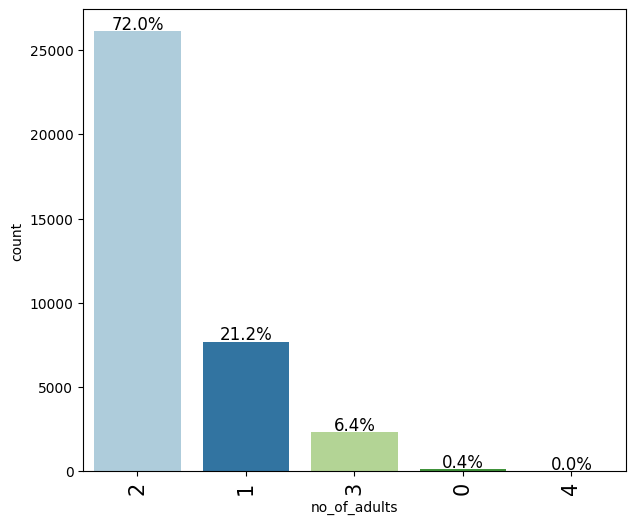

In [ ]:
labeled_barplot(df, "no_of_adults", perc=True)



*   72% of the customers are 2 adults




### Observations on number of children

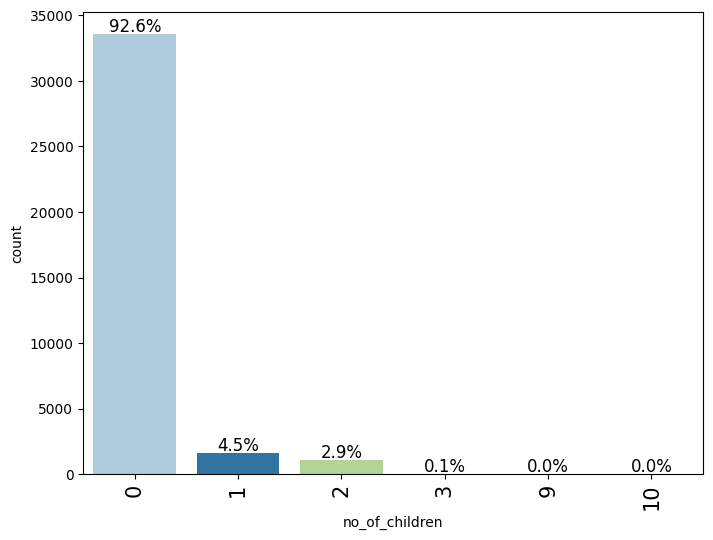

In [ ]:
labeled_barplot(df, "no_of_children", perc=True)



*   92.6% of the customers come without children
*   Only 4.5% customers come with 1 child and 2.9% come with 2 children.



In [ ]:
df.loc[df["no_of_children"]>3].shape

(3, 19)

In [5]:
df["no_of_children"] = df["no_of_children"].replace([9,10], 3)

### Observations on number of weekend nights

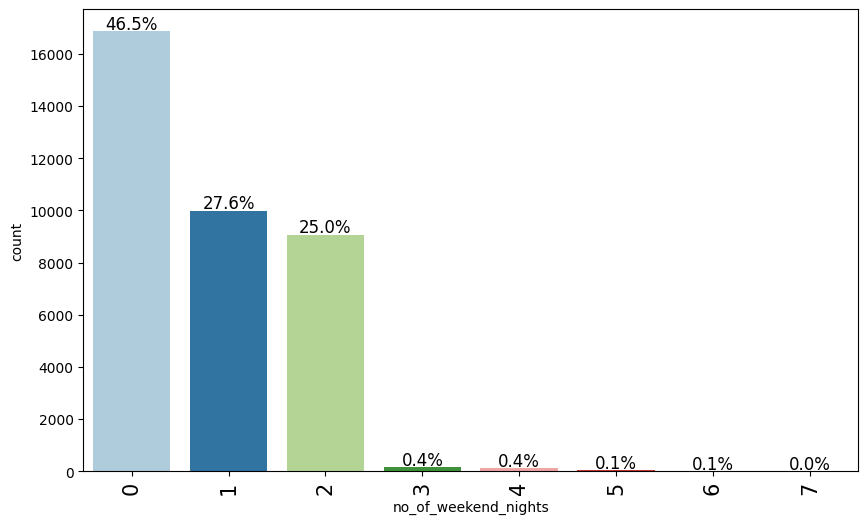

In [ ]:
labeled_barplot(df, "no_of_weekend_nights", perc=True)



*   46.5% of the customers didn't stay weekend nights
*   27.6% stayed for a one weekend night and 25% for 2 weekend night.



### Observations on number of weekday nights

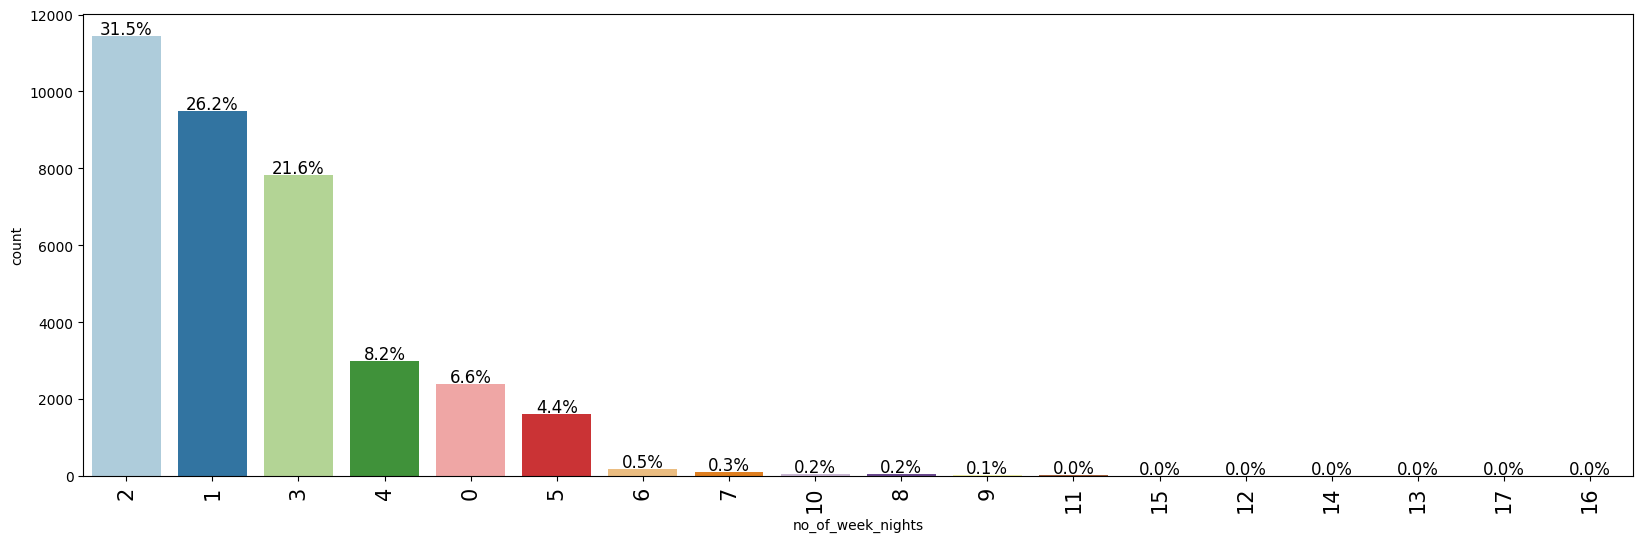

In [ ]:
labeled_barplot(df, "no_of_week_nights", perc=True)



*   31.5% of customers stayed for 2 weekday nights
*   26.2% for 1 weekday night and 21.6 for 3 nights.
*   4.4% customers stayed for 5 weekday nights.



### Observations on meal plan type

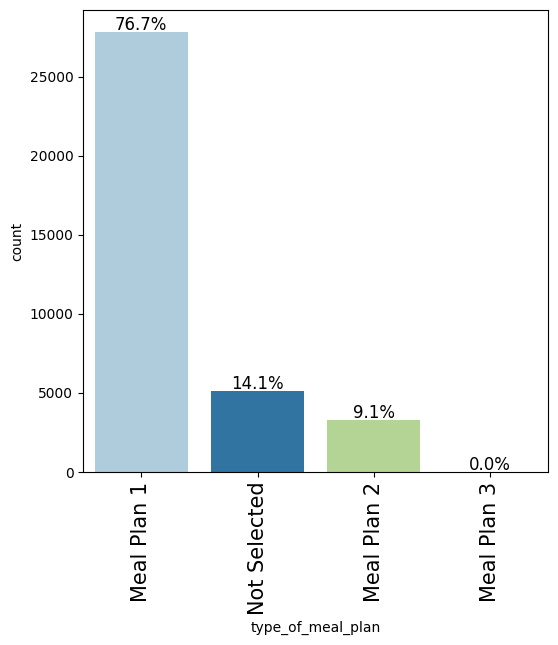

In [ ]:
labeled_barplot(df, "type_of_meal_plan", perc=True)



*   76.7% of the customer opted for Meal Plan1.



### Observations on number of required car parking space

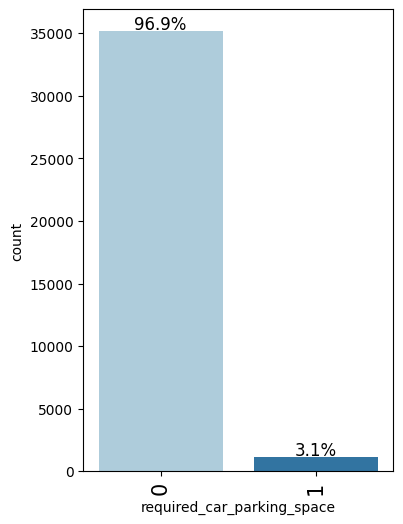

In [ ]:
labeled_barplot(df, "required_car_parking_space", perc=True)



*   Only 3.1% customers needed some car parking space, rest didn't need it.




### Observations on room type reserved

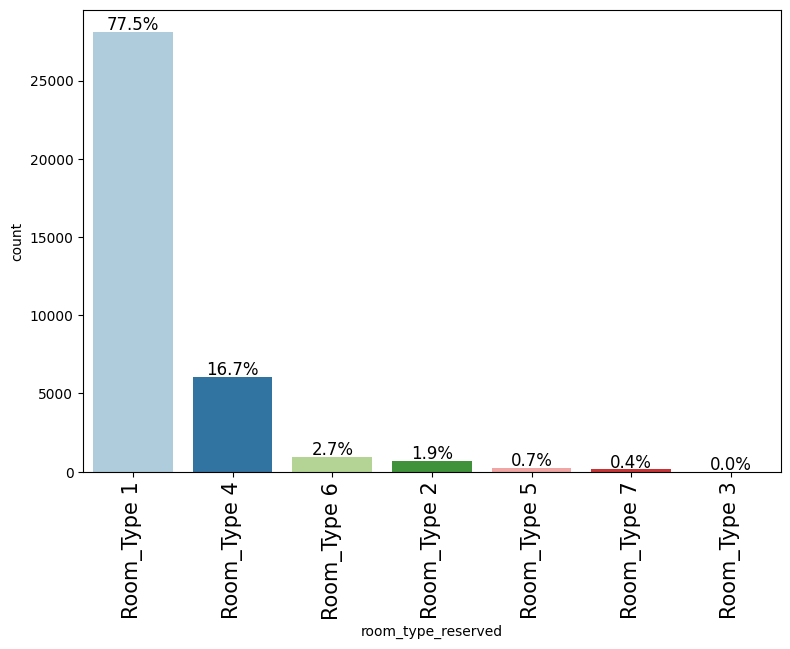

In [ ]:
labeled_barplot(df, "room_type_reserved", perc=True)

*   77.5% of the customer opted for Room Type 1 with 16.7% for Room Type 4.

### Observations on lead time

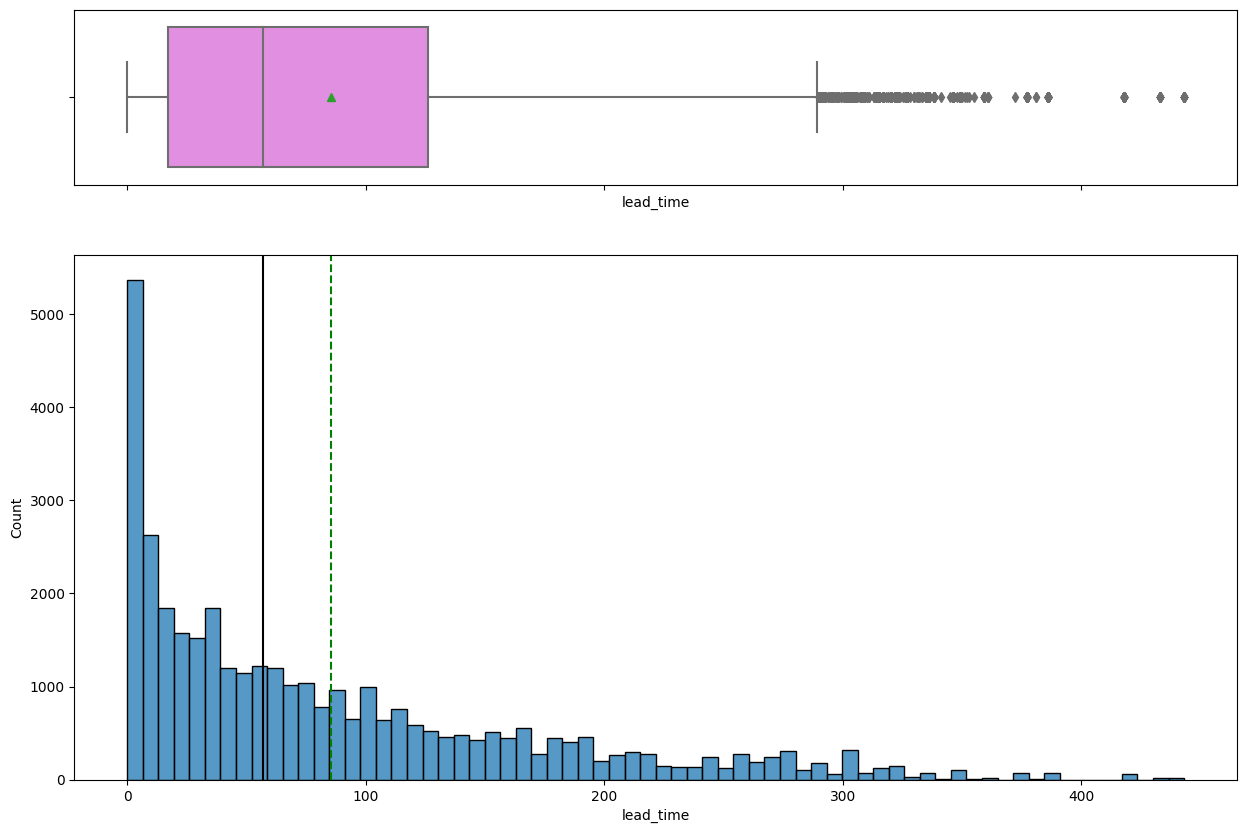

In [ ]:
histogram_boxplot(df, "lead_time")

### Observations on arrival year

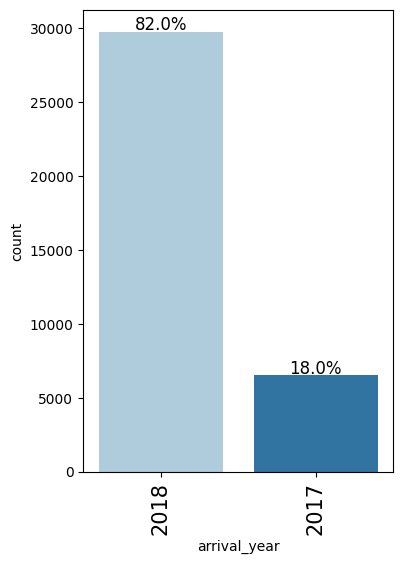

In [ ]:
labeled_barplot(df, "arrival_year", perc=True)

### Observations on arrival month

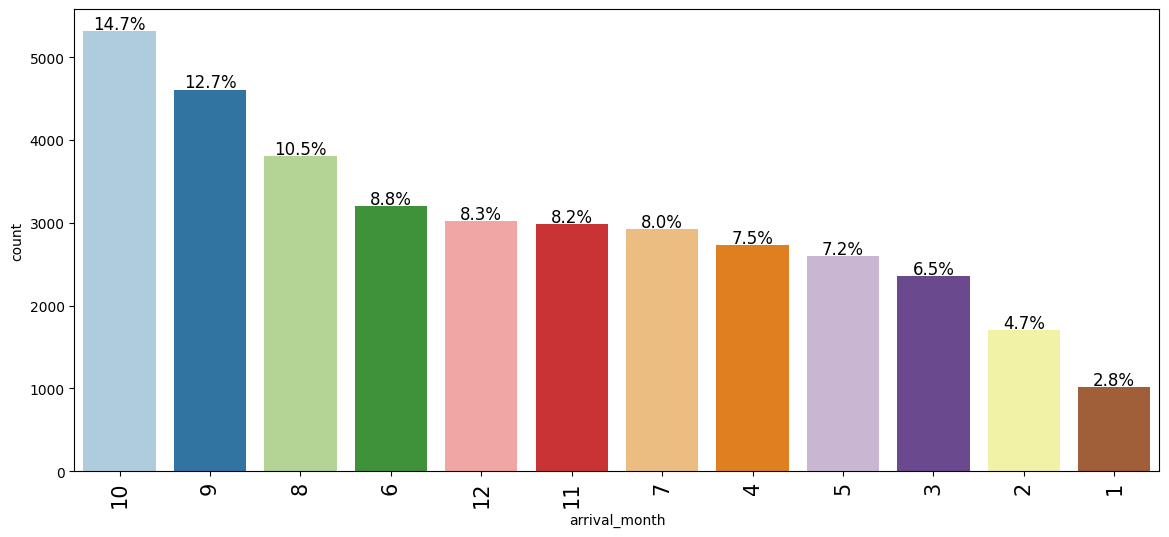

In [ ]:
labeled_barplot(df, "arrival_month", perc=True)



*   There are more customers in the months of August, September and maximum in October




### Observations on arrival date

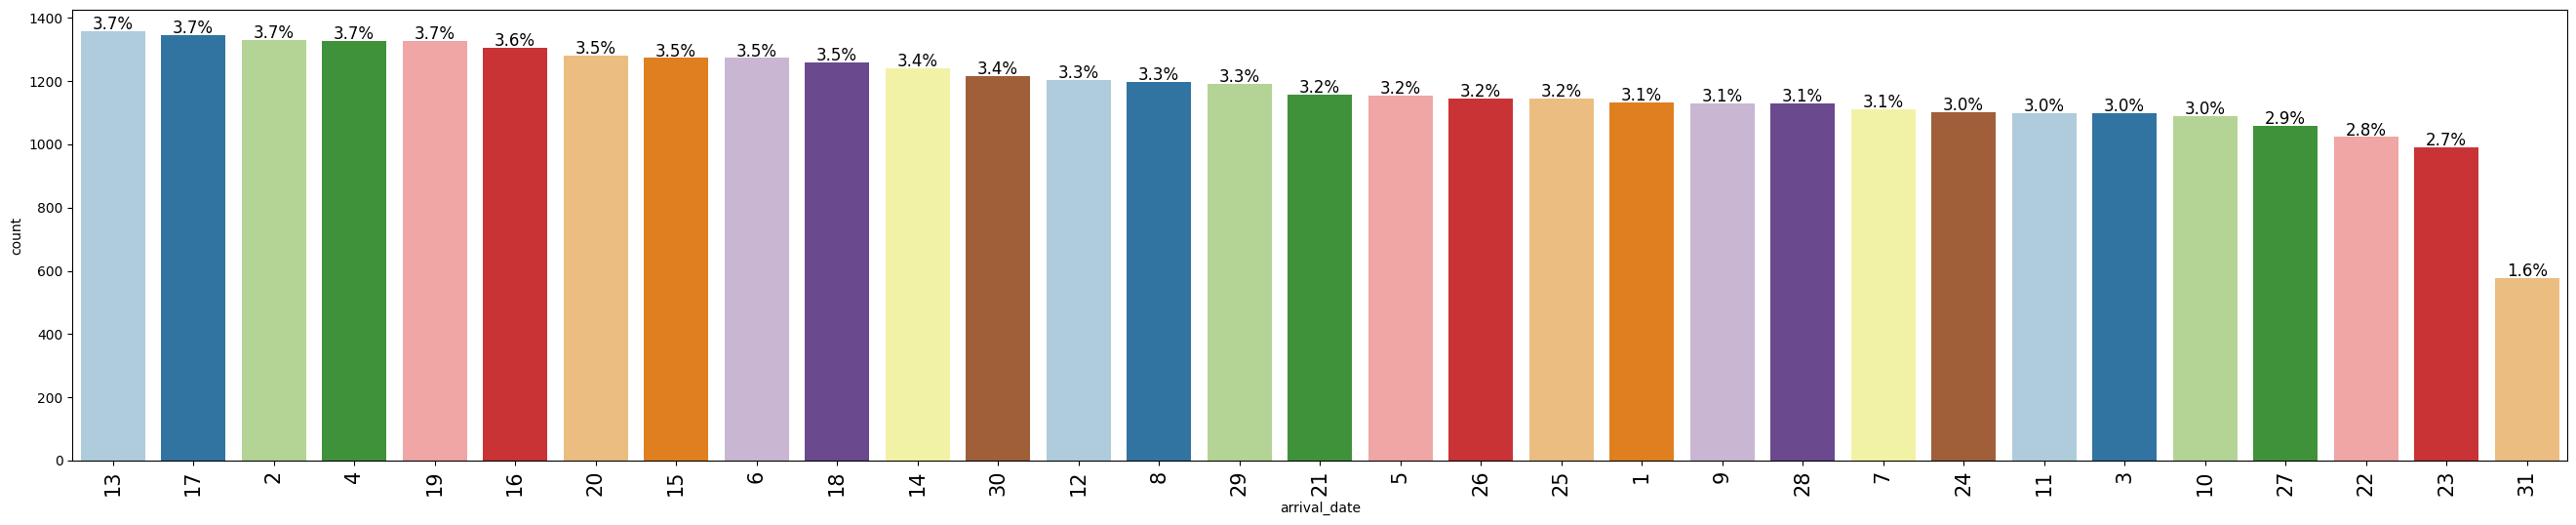

In [ ]:
labeled_barplot(df, "arrival_date", perc=True)

### Observations on market segment type

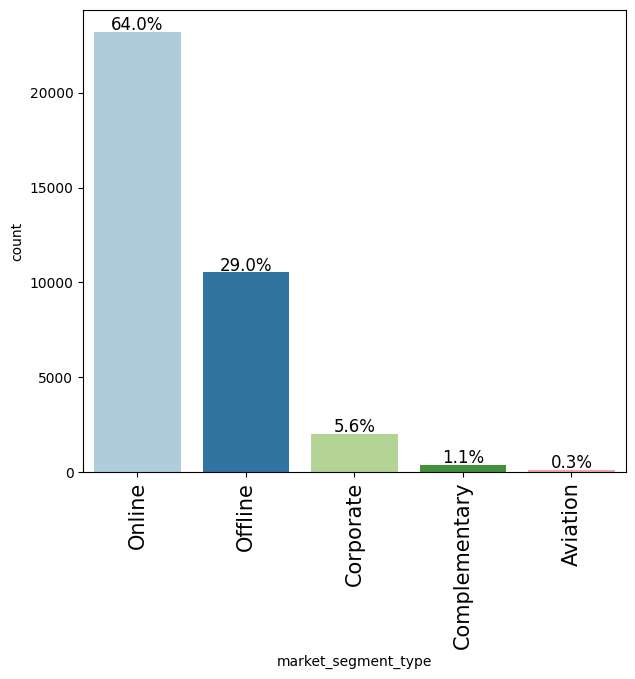

In [ ]:
labeled_barplot(df, "market_segment_type", perc=True)

*   There are more customers coming through Online (64%) followed by offline (29%) market segment type.

### Observations on repeated guests

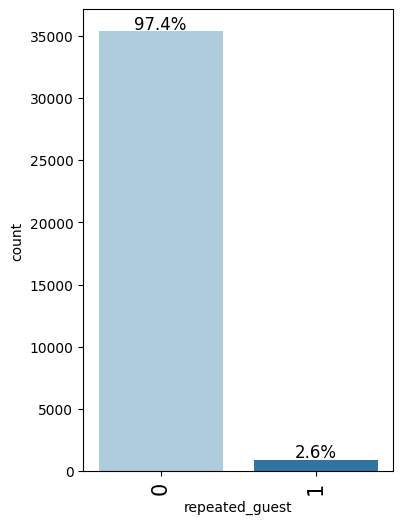

In [ ]:
labeled_barplot(df, "repeated_guest", perc=True)

*   Most of the customers (97.4%) are new customers.
*   Only 2.6% of the customers are repeating ones.

### Observations on average price per room

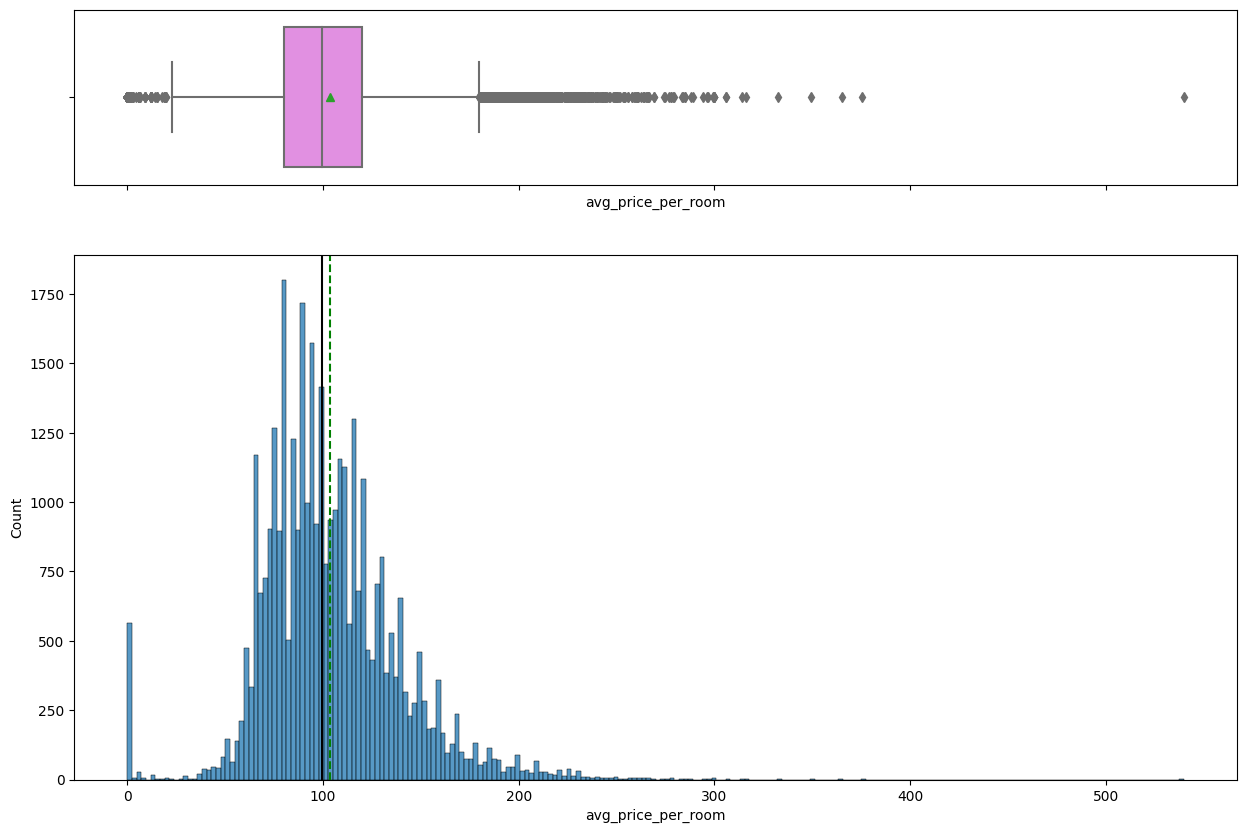

In [ ]:
histogram_boxplot(df, "avg_price_per_room")

In [ ]:
df[df["avg_price_per_room"] == 0]

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
63      INN00064             1               0                     0   
145     INN00146             1               0                     0   
209     INN00210             1               0                     0   
266     INN00267             1               0                     0   
267     INN00268             1               0                     2   
...          ...           ...             ...                   ...   
35983   INN35984             1               0                     0   
36080   INN36081             1               0                     1   
36114   INN36115             1               0                     0   
36217   INN36218             2               0                     2   
36250   INN36251             1               0                     0   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
63                     1       Meal Plan 1                           0   
145                    2       Meal Plan 1                           0   
209                    0       Meal Plan 1                           0   
266                    2       Meal Plan 1                           0   
267                    1       Meal Plan 1                           0   
...                  ...               ...                         ...   
35983                  1       Meal Plan 1                           0   
36080                  1       Meal Plan 1                           0   
36114                  1       Meal Plan 1                           0   
36217                  1       Meal Plan 1                           0   
36250                  2       Meal Plan 2                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
63           Room_Type 1          2          2017              9   
145          Room_Type 1         13          2018              6   
209          Room_Type 1          4          2018              2   
266          Room_Type 1          1          2017              8   
267          Room_Type 1          4          2017              8   
...                  ...        ...           ...            ...   
35983        Room_Type 7          0          2018              6   
36080        Room_Type 7          0          2018              3   
36114        Room_Type 1          1          2018              3   
36217        Room_Type 2          3          2017              8   
36250        Room_Type 1          6          2017             12   

       arrival_date market_segment_type  repeated_guest  \
63               10       Complementary               0   
145               1       Complementary               1   
209              27       Complementary               0   
266              12       Complementary               1   
267              23       Complementary               0   
...             ...                 ...             ...   
35983             7       Complementary               1   
36080            21       Complementary               1   
36114             2              Online               0   
36217             9              Online               0   
36250            10              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
63                                0                                     0   
145                               3                                     5   
209                               0                                     0   
266                               0                                     1   
267                               0                                     0   
...                             ...                                   ...   
35983                             4                                    17   
36080                             3                                    15   
36114                            

In [6]:
df.loc[df["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

In [7]:
Q1 = df["avg_price_per_room"].quantile(0.25)
Q3 = df["avg_price_per_room"].quantile(0.75)
IQR = Q3 - Q1
Upper_Whisker = Q3 + 1.5*IQR
print("Q1 = ", Q1, "Q3 = ", Q3, "Upper Whisker = ", Upper_Whisker)

Q1 =  80.3 Q3 =  120.0 Upper Whisker =  179.55


In [8]:
# assigning the outliers the value of upper whisker
df.loc[df["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

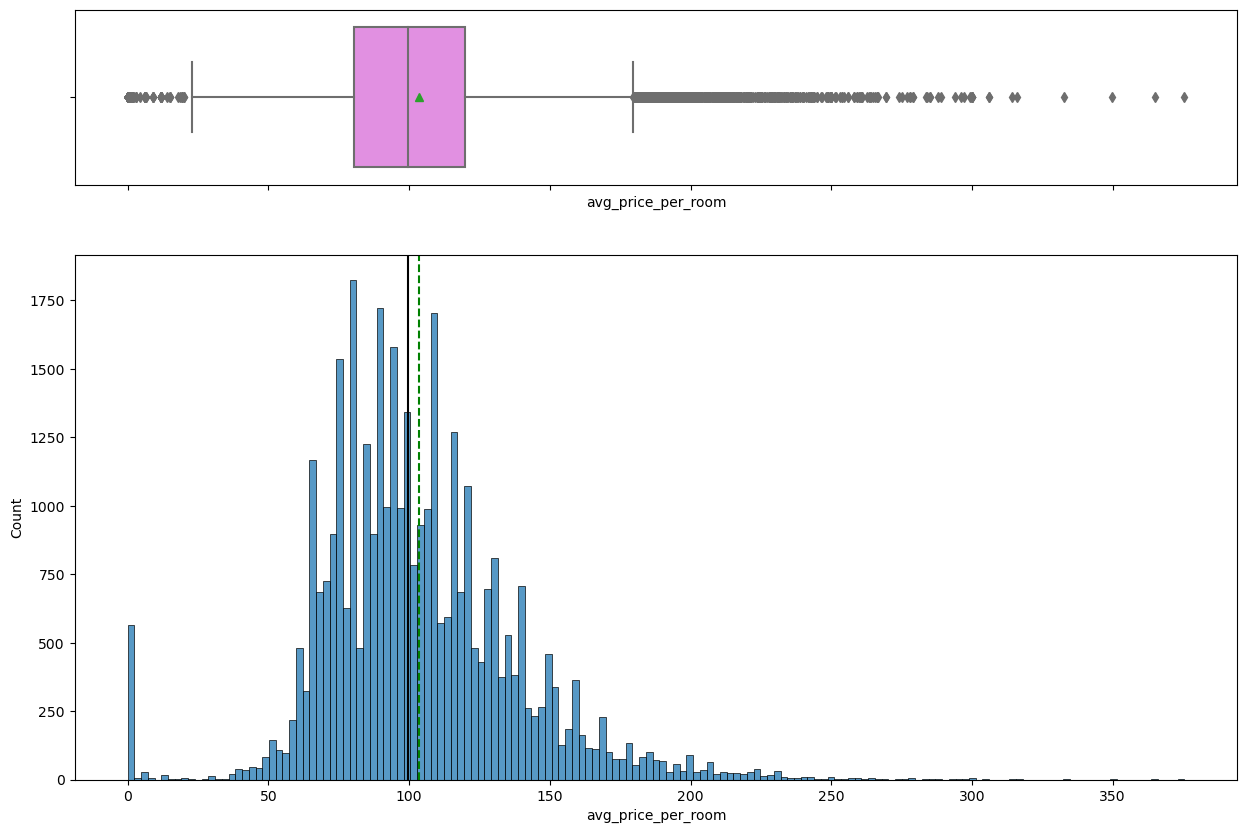

In [ ]:
histogram_boxplot(df, "avg_price_per_room")

### Observations on number of previous booking cancellations

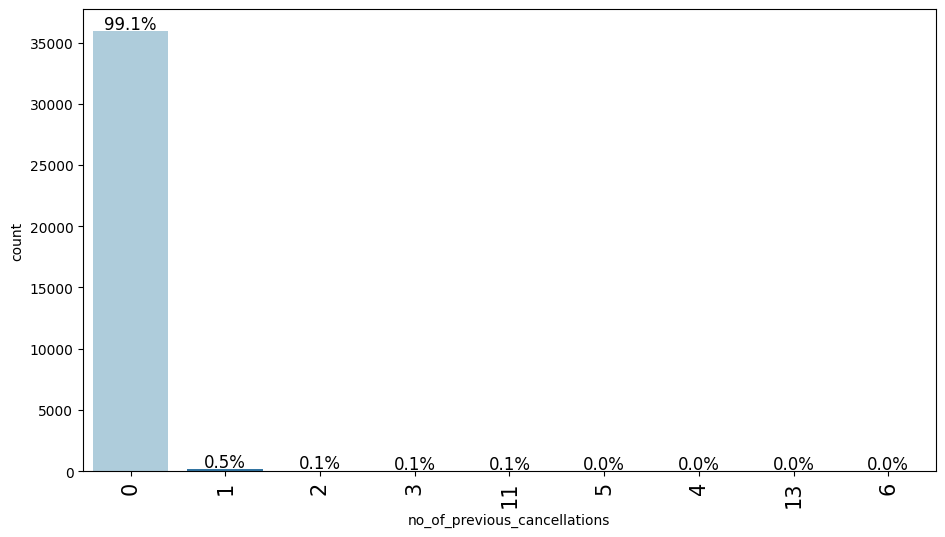

In [ ]:
labeled_barplot(df, "no_of_previous_cancellations", perc=True)

*   Only 0.5% of the customers have prior cancellations. Most of the customers (99%) are customers without any prior cancellations.


### Observations on number of previous booking not cancelled

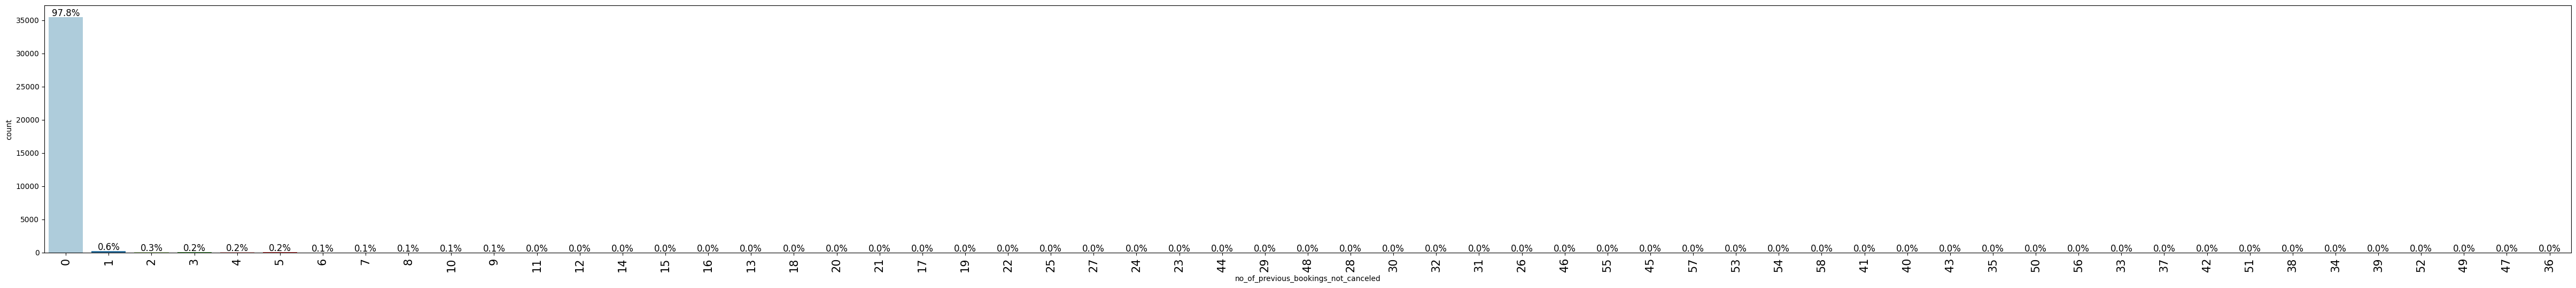

In [ ]:
labeled_barplot(df, "no_of_previous_bookings_not_canceled", perc=True)

### Observations on number of special requests

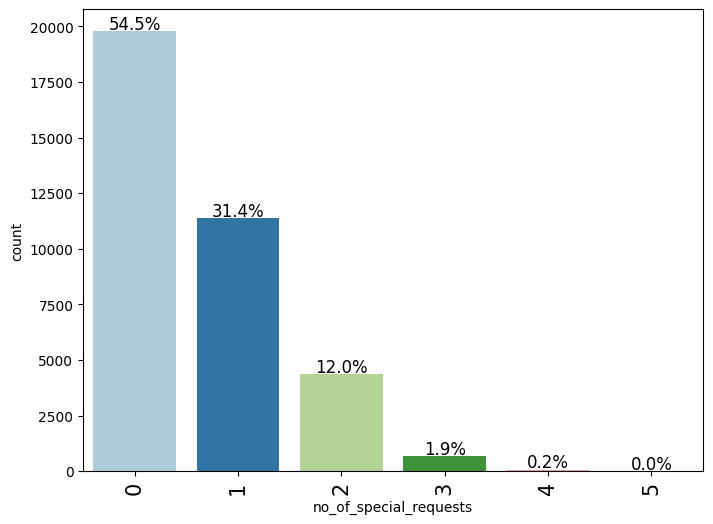

In [ ]:
labeled_barplot(df, "no_of_special_requests", perc=True)



*   54.5% of the customers didn't have any special requests
*   31.4% have at least one special request and 12% have 2 requests.



### Observations on booking status

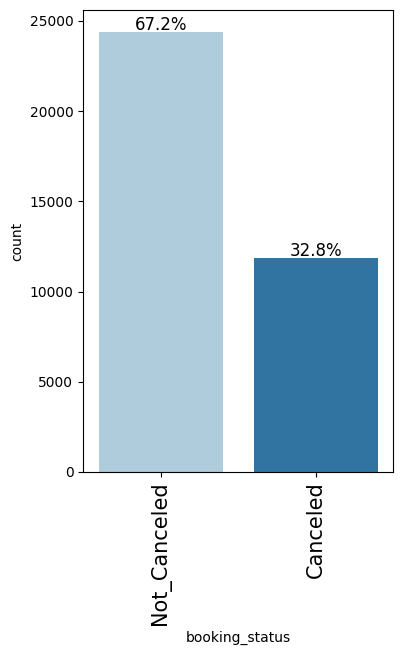

In [ ]:
labeled_barplot(df, "booking_status", perc=True)

*   32.8% customers have cancelations.



**Replace canceled booking to 1 and not cancelled to 0**

In [9]:
df['booking_status'] = df['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

In [ ]:
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  booking_status  
0                       0               0  
1                       1               0  
2                       0               1  
3                       0               1  
4                       0               1

### Bivariate Analysis

**Supporting functions for analysis**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Correlation Check**

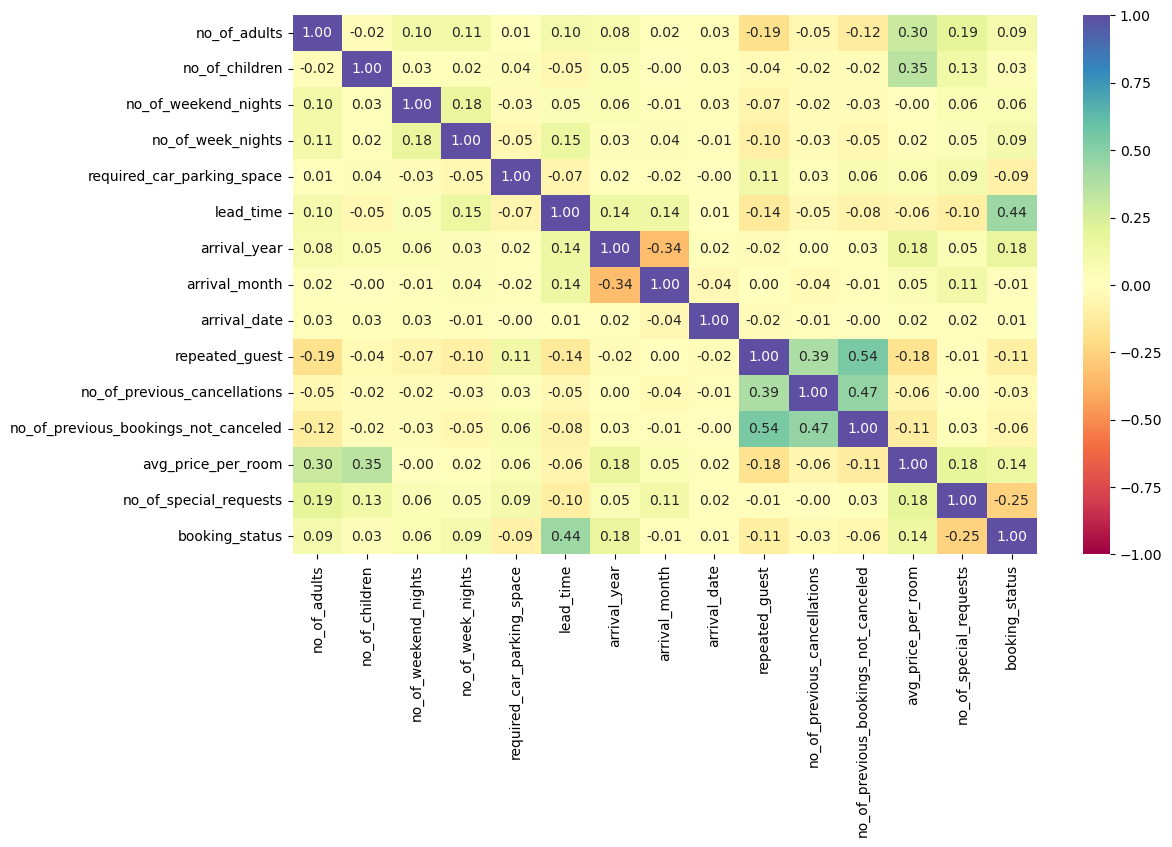

In [ ]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()



*   Booking status has .44 correlation with lead_time
*   avg_price_per_room has ~.30 correlation with no_of_adults and no_of_children
*   There is no strong correlation with any other combinations.



**Room average price VS market type**

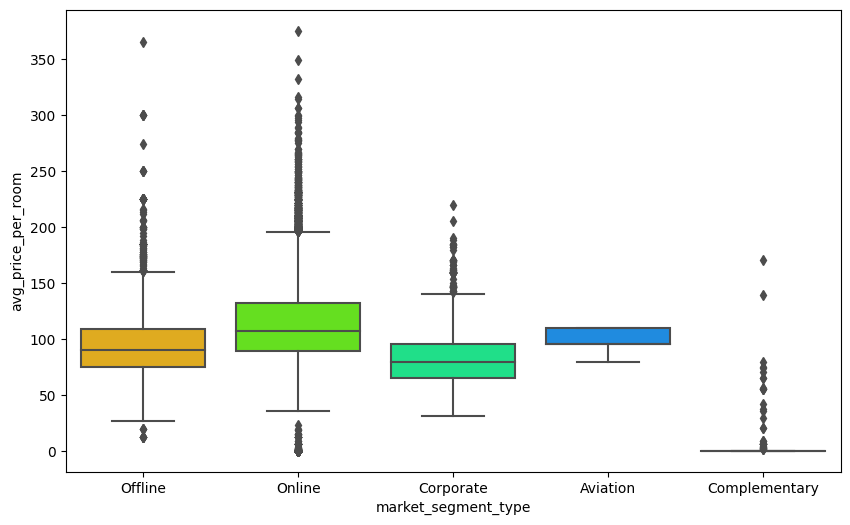

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

**Market Segment VS Booking status**

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


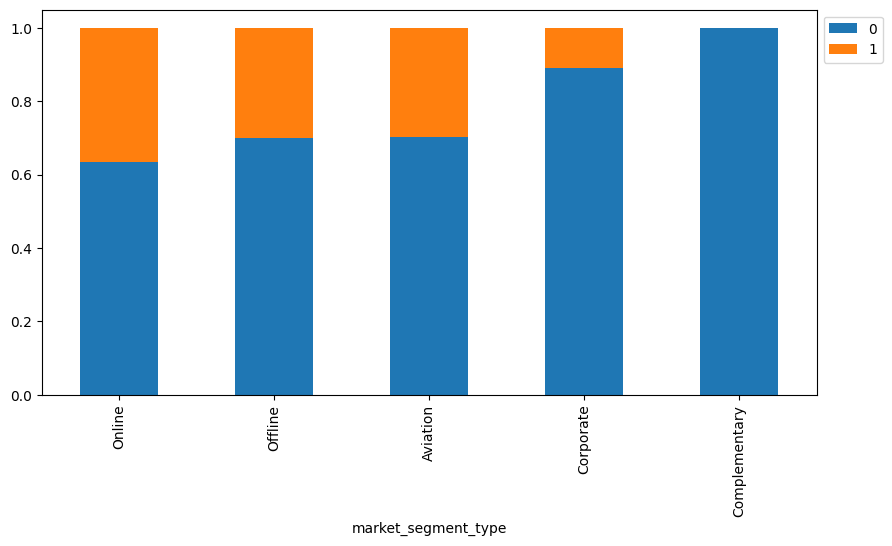

In [ ]:
stacked_barplot(df, "market_segment_type", "booking_status")



*   There are more cancellations with online booking followed by offline and Aviation bookings



**Room type reserved VS booking status**

booking_status          0      1    All
room_type_reserved                     
All                 24390  11885  36275
Room_Type 1         19058   9072  28130
Room_Type 4          3988   2069   6057
Room_Type 6           560    406    966
Room_Type 2           464    228    692
Room_Type 5           193     72    265
Room_Type 7           122     36    158
Room_Type 3             5      2      7
------------------------------------------------------------------------------------------------------------------------


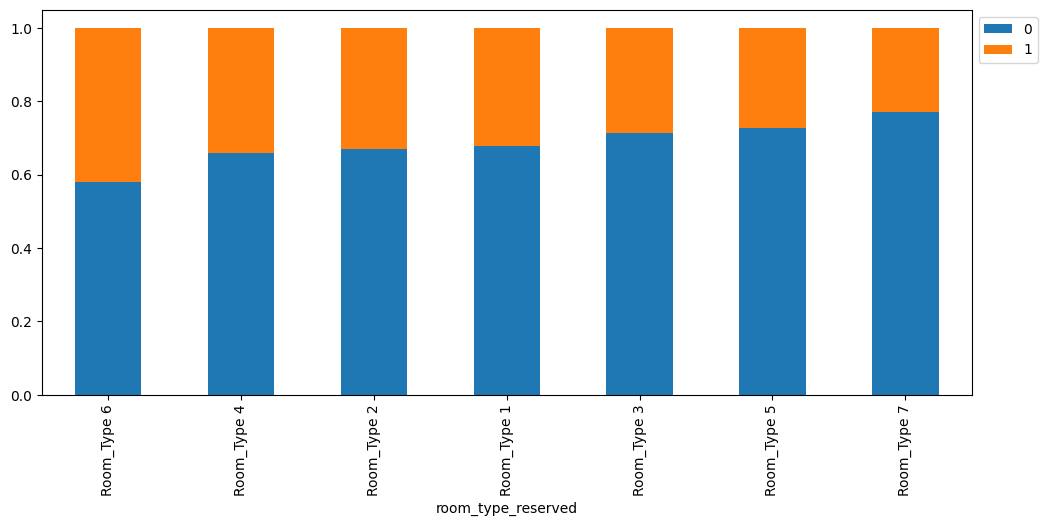

In [ ]:
stacked_barplot(df, "room_type_reserved", "booking_status")



*   Room type 6 has more cancellations. Though room type 1 has more reservations, there are less cancellations with room type 1.




**Special requests VS booking status**

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


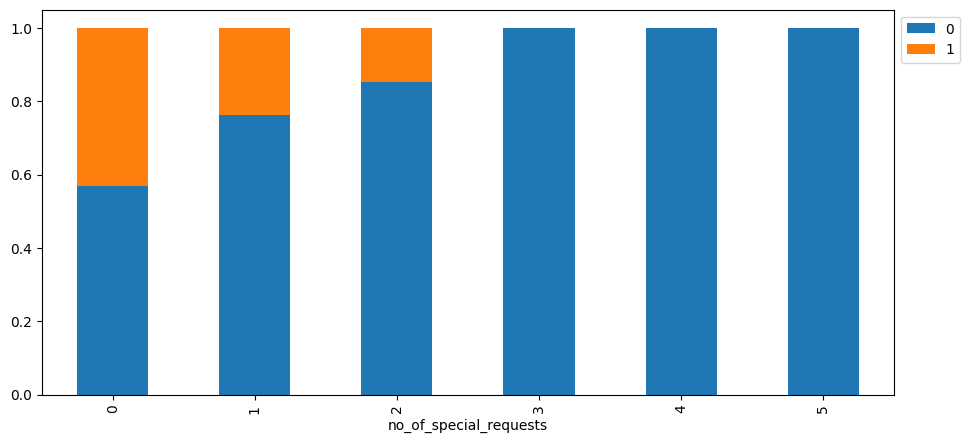

In [ ]:
stacked_barplot(df, "no_of_special_requests", "booking_status")



*   More special requests, there is less cancellation.
*   Cancellations are more when there are no special requests.



**Average price per room VS booking status**

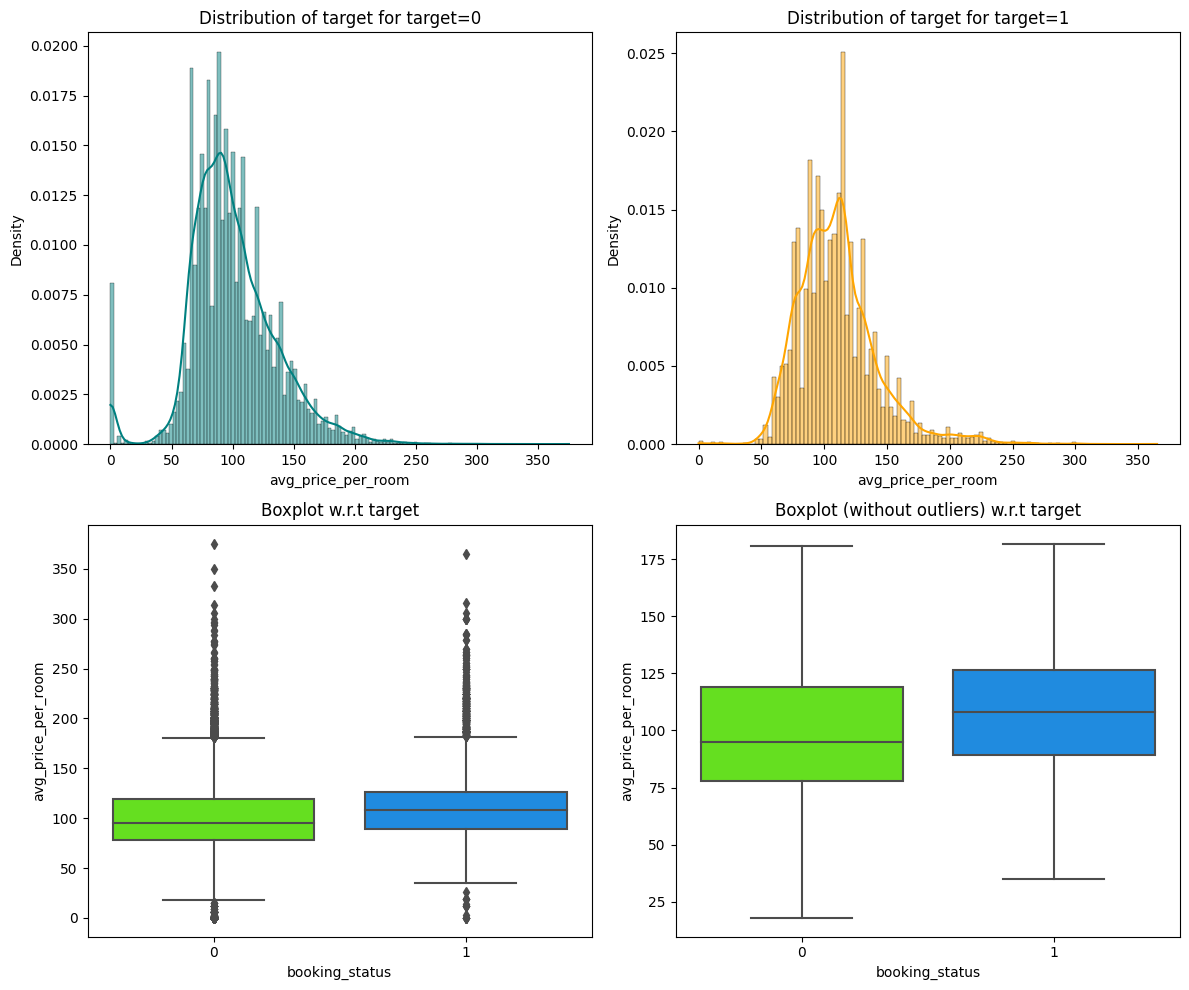

In [ ]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

**Lead time vs booking status**

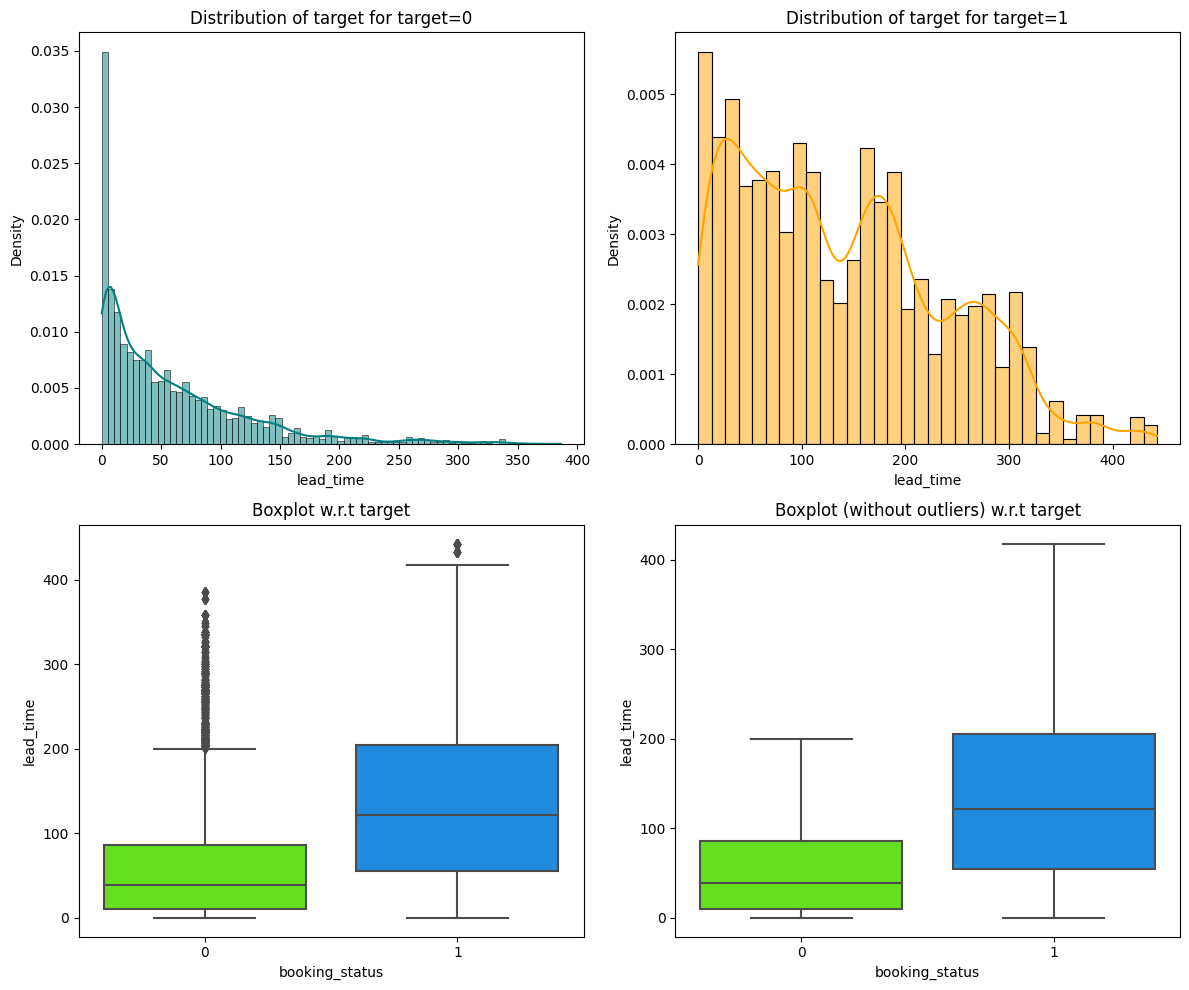

In [ ]:
distribution_plot_wrt_target(df, "lead_time", "booking_status")



*   More lead time, more cancellations and less lead time less cancellations




**Analysis on family details including adults with children**

In [ ]:
family_data = df[(df['no_of_adults'] > 1) & (df['no_of_children'] >= 0)]
family_data.shape

(28441, 19)

In [ ]:
family_data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   
5   INN00006             2               0                     0   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   
5                  2       Meal Plan 2                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   
5        Room_Type 1        346          2018              9            13   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   
5              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
3                                     0              100.00   
4                                     0               94.50   
5                                     0              115.00   

   no_of_special_requests  booking_status  
0                       0               0  
1                       1               0  
3                       0               1  
4                       0               1  
5                       1               1

In [ ]:
family_data["total_members"] = family_data["no_of_adults"] + family_data["no_of_children"]
family_data.head()

family_data[family_data["total_members"] > 2]

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
8       INN00009             3               0                     0   
42      INN00043             3               0                     2   
60      INN00061             2               2                     0   
76      INN00077             3               0                     1   
78      INN00079             3               0                     2   
...          ...           ...             ...                   ...   
36249   INN36250             2               2                     0   
36259   INN36260             3               0                     0   
36260   INN36261             3               0                     1   
36269   INN36270             2               2                     0   
36270   INN36271             3               0                     2   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
8                      4       Meal Plan 1                           0   
42                     1       Meal Plan 1                           0   
60                     1       Meal Plan 1                           1   
76                     1       Meal Plan 1                           0   
78                     5       Meal Plan 1                           0   
...                  ...               ...                         ...   
36249                  3       Meal Plan 1                           0   
36259                  3       Meal Plan 1                           0   
36260                  4       Meal Plan 1                           1   
36269                  1       Meal Plan 1                           0   
36270                  6       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
8            Room_Type 1        121          2018              7   
42           Room_Type 1         96          2018              4   
60           Room_Type 6          2          2018              9   
76           Room_Type 4        267          2018             12   
78           Room_Type 4        155          2018              6   
...                  ...        ...           ...            ...   
36249        Room_Type 6         65          2018              7   
36259        Room_Type 1         16          2017              9   
36260        Room_Type 4        178          2018              8   
36269        Room_Type 6          0          2018             10   
36270        Room_Type 4         85          2018              8   

       arrival_date market_segment_type  repeated_guest  \
8                 6             Offline               0   
42               10              Online               0   
60                2              Online               0   
76               31              Online               0   
78               28              Online               0   
...             ...                 ...             ...   
36249            27              Online               0   
36259             9              Online               0   
36260             1              Online               0   
36269             6              Online               0   
36270             3              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
8                                 0                                     0   
42                                0                                     0   
60                                0                                     0   
76                                0                                     0   
78                                0                                     0   
...                             ...                                   ...   
36249                             0                                     0   
36259                             0                                     0   
36260                            

booking_status      0     1    All
total_members                     
All             18456  9985  28441
2               15506  8213  23719
3                2425  1368   3793
4                 514   398    912
5                  11     6     17
------------------------------------------------------------------------------------------------------------------------


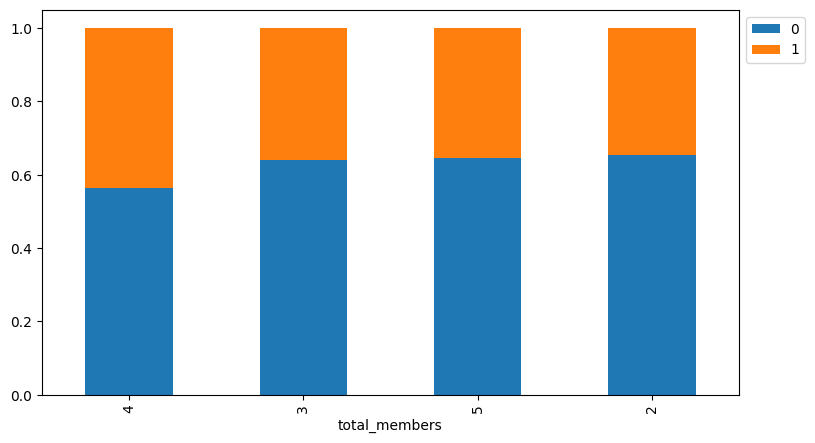

In [ ]:
stacked_barplot(family_data, "total_members", "booking_status")



*   All categories have cancellations




**Similar analysis on customers who stayed at least a night in the hotel**

In [ ]:
customer_stayed_data = df[(df['no_of_weekend_nights'] > 0) & (df['no_of_week_nights'] > 1)]
customer_stayed_data.shape

(12688, 19)

In [ ]:
customer_stayed_data["total_days"] = df['no_of_weekend_nights'] + df['no_of_week_nights']
customer_stayed_data

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
6       INN00007             2               0                     1   
7       INN00008             2               0                     1   
17      INN00018             2               0                     1   
...          ...           ...             ...                   ...   
36266   INN36267             2               0                     2   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                           0   
1                      3      Not Selected                           0   
6                      3       Meal Plan 1                           0   
7                      3       Meal Plan 1                           0   
17                     3      Not Selected                           0   
...                  ...               ...                         ...   
36266                  2       Meal Plan 1                           0   
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
0            Room_Type 1        224          2017             10   
1            Room_Type 1          5          2018             11   
6            Room_Type 1         34          2017             10   
7            Room_Type 4         83          2018             12   
17           Room_Type 1          1          2017              8   
...                  ...        ...           ...            ...   
36266        Room_Type 2          8          2018              3   
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
0                 2             Offline               0   
1                 6              Online               0   
6                15              Online               0   
7                26              Online               0   
17               10              Online               0   
...             ...                 ...             ...   
36266             4              Online               0   
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                                 0                                     0   
1                                 0                                     0   
6                                 0                                     0   
7                                 0                                     0   
17                                0                                     0   
...                             ...                                   ...   
36266                             0                                     0   
36270                             0                                     0   
36271                            

booking_status     0     1    All
total_days                       
All             8057  4631  12688
4               2977  1387   4364
3               2068  1338   3406
5               1593   738   2331
6                566   465   1031
7                590   383    973
8                100    79    179
10                51    58    109
9                 58    53    111
14                 5    27     32
15                 5    26     31
13                 3    15     18
12                 9    15     24
11                24    15     39
20                 3     8     11
19                 1     5      6
16                 1     5      6
17                 1     4      5
18                 0     3      3
21                 1     3      4
22                 0     2      2
23                 1     1      2
24                 0     1      1
------------------------------------------------------------------------------------------------------------------------


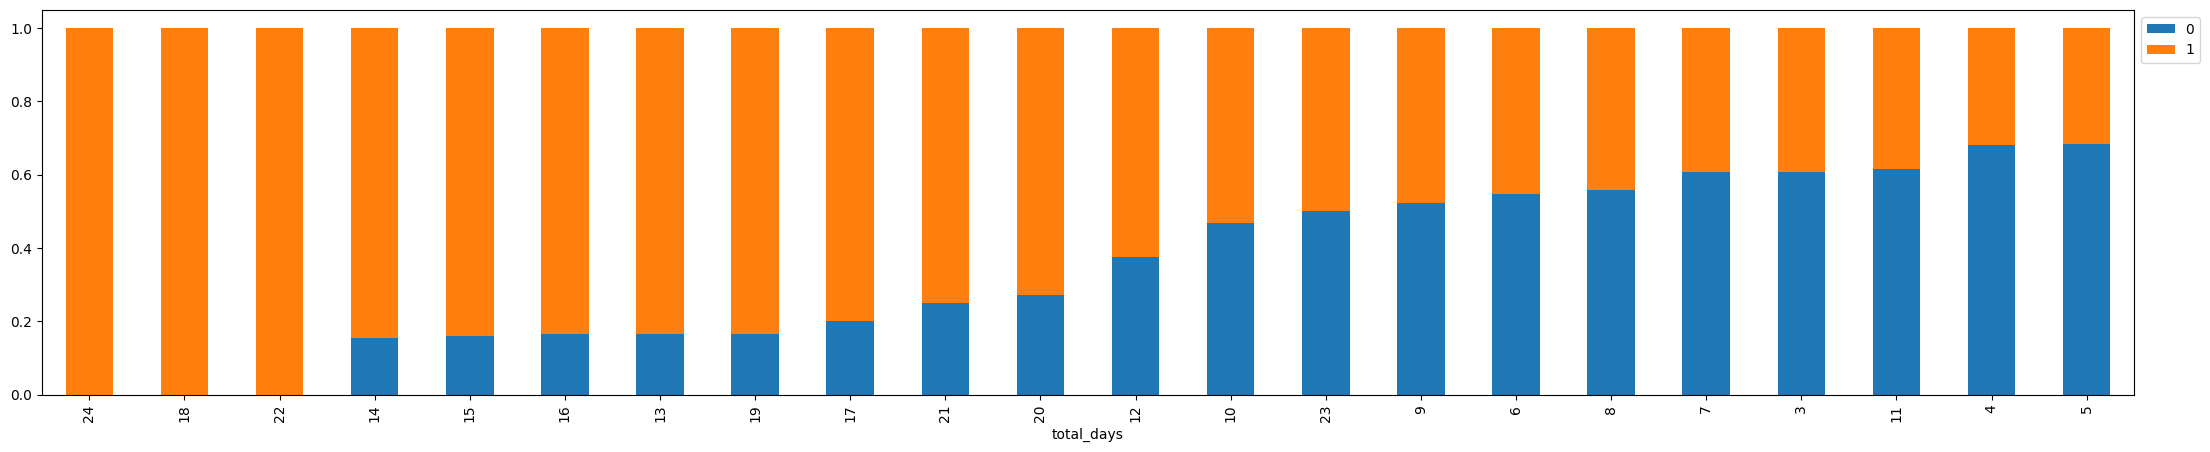

In [ ]:
stacked_barplot(customer_stayed_data, "total_days", "booking_status")

**Repeating guests VS booking status**

booking_status     0     1    All
repeated_guest                   
All             8057  4631  12688
0               7975  4628  12603
1                 82     3     85
------------------------------------------------------------------------------------------------------------------------


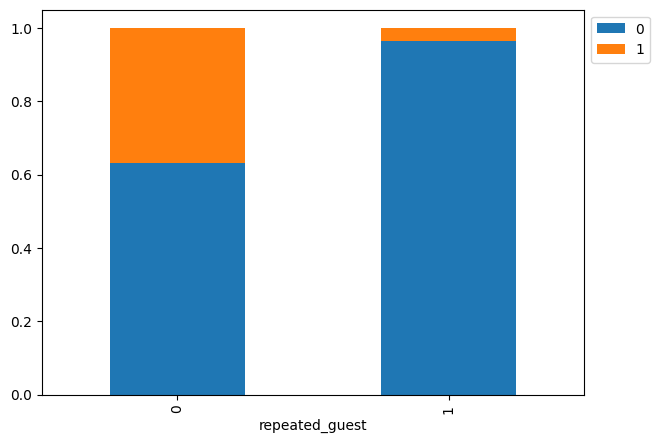

In [ ]:
stacked_barplot(customer_stayed_data, "repeated_guest", "booking_status")



*   Cancellations are very less among repeated guests
*   More cancellations are with new customers



**Analysis based on the month of the reservations**

In [ ]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = df.groupby(["arrival_month"])["booking_status"].count()
monthly_data



arrival_month
1     1014
2     1704
3     2358
4     2736
5     2598
6     3203
7     2920
8     3813
9     4611
10    5317
11    2980
12    3021
Name: booking_status, dtype: int64

In [ ]:
# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)
monthly_data

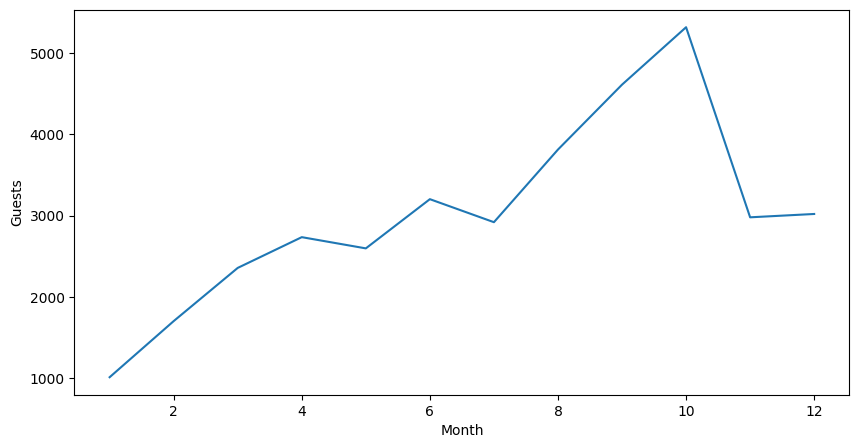

In [ ]:
# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()



*   Booking increases in the 2nd half of the year specially between September and October
*   Booking is very low in the beginning of the year



**Arrival month VS booking status**

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


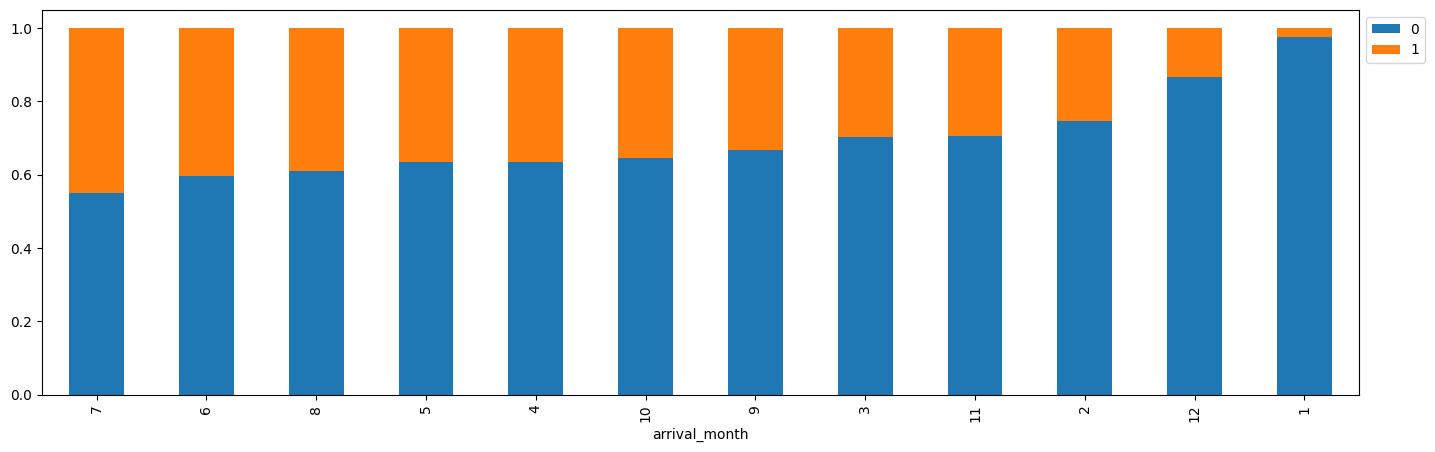

In [ ]:
stacked_barplot(df, "arrival_month", "booking_status")



*   More cancellations in July
*   Less cancallations in January and December



**Average room price VS arrival month**

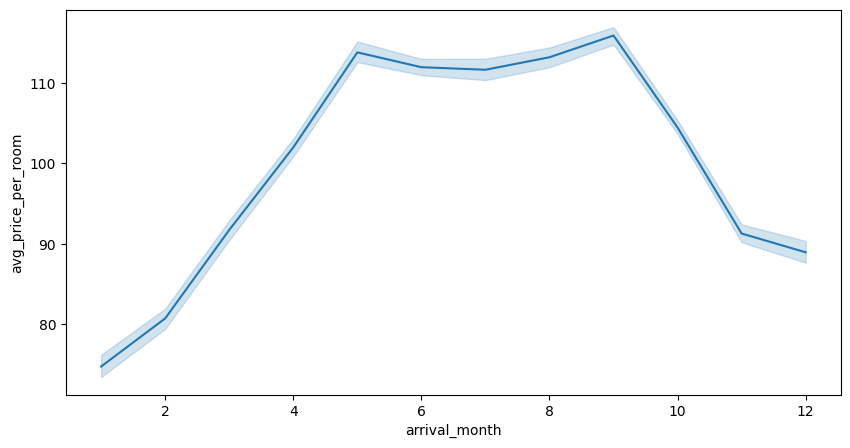

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(df, x = 'arrival_month', y='avg_price_per_room') ## Complete the code to create lineplot between average price per room and arrival month
plt.show()



*   Average room price is high during the months May, June, July, August, September and October
*   Average room price is very low in the beginning of the year and slowly goes up.



## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Outliner detection and treatment**

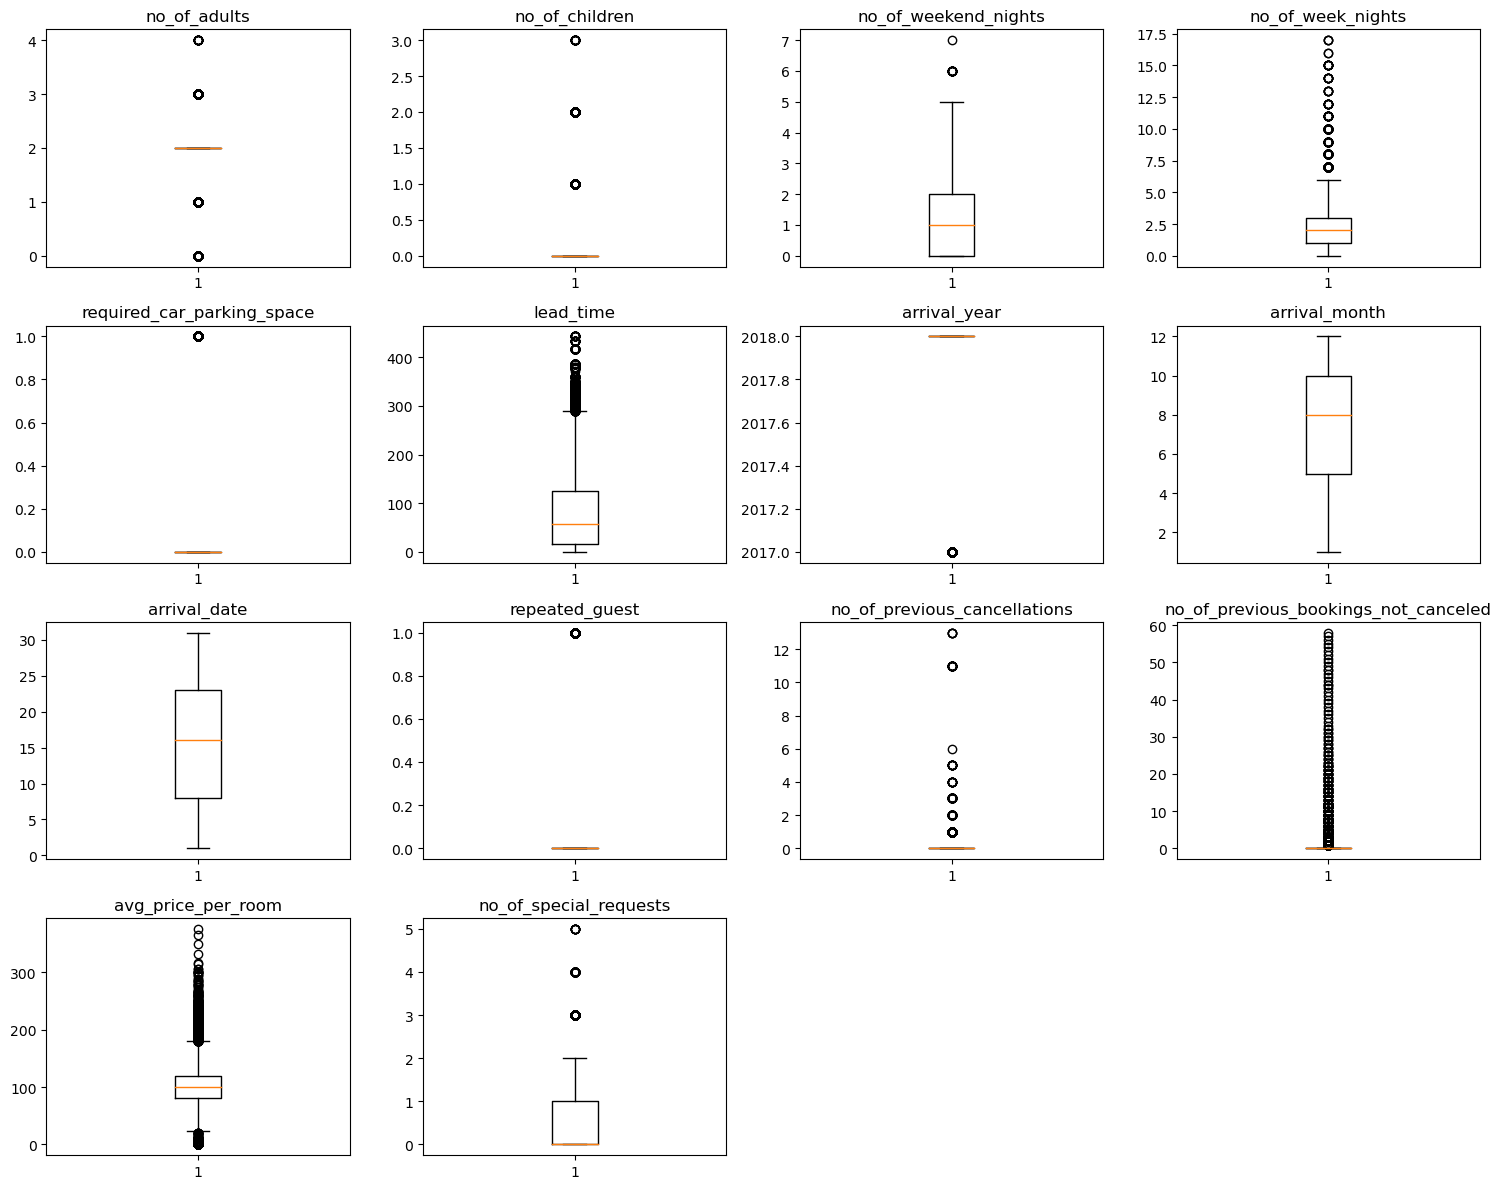

In [ ]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()



*   All numerical columns have outliners except arrival_month
*   no_of_adults has both low and high outliners
*   All other columns has high outliners
*   ***Since all are valid data, we are not replacing outliners***





### Outlier Treatment

In [ ]:
# functions to treat outliers by flooring and capping

def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [ ]:
# just checking outliner cleaning on a temporary dataframe
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df_tmp = treat_outliers_all(df, numerical_col)

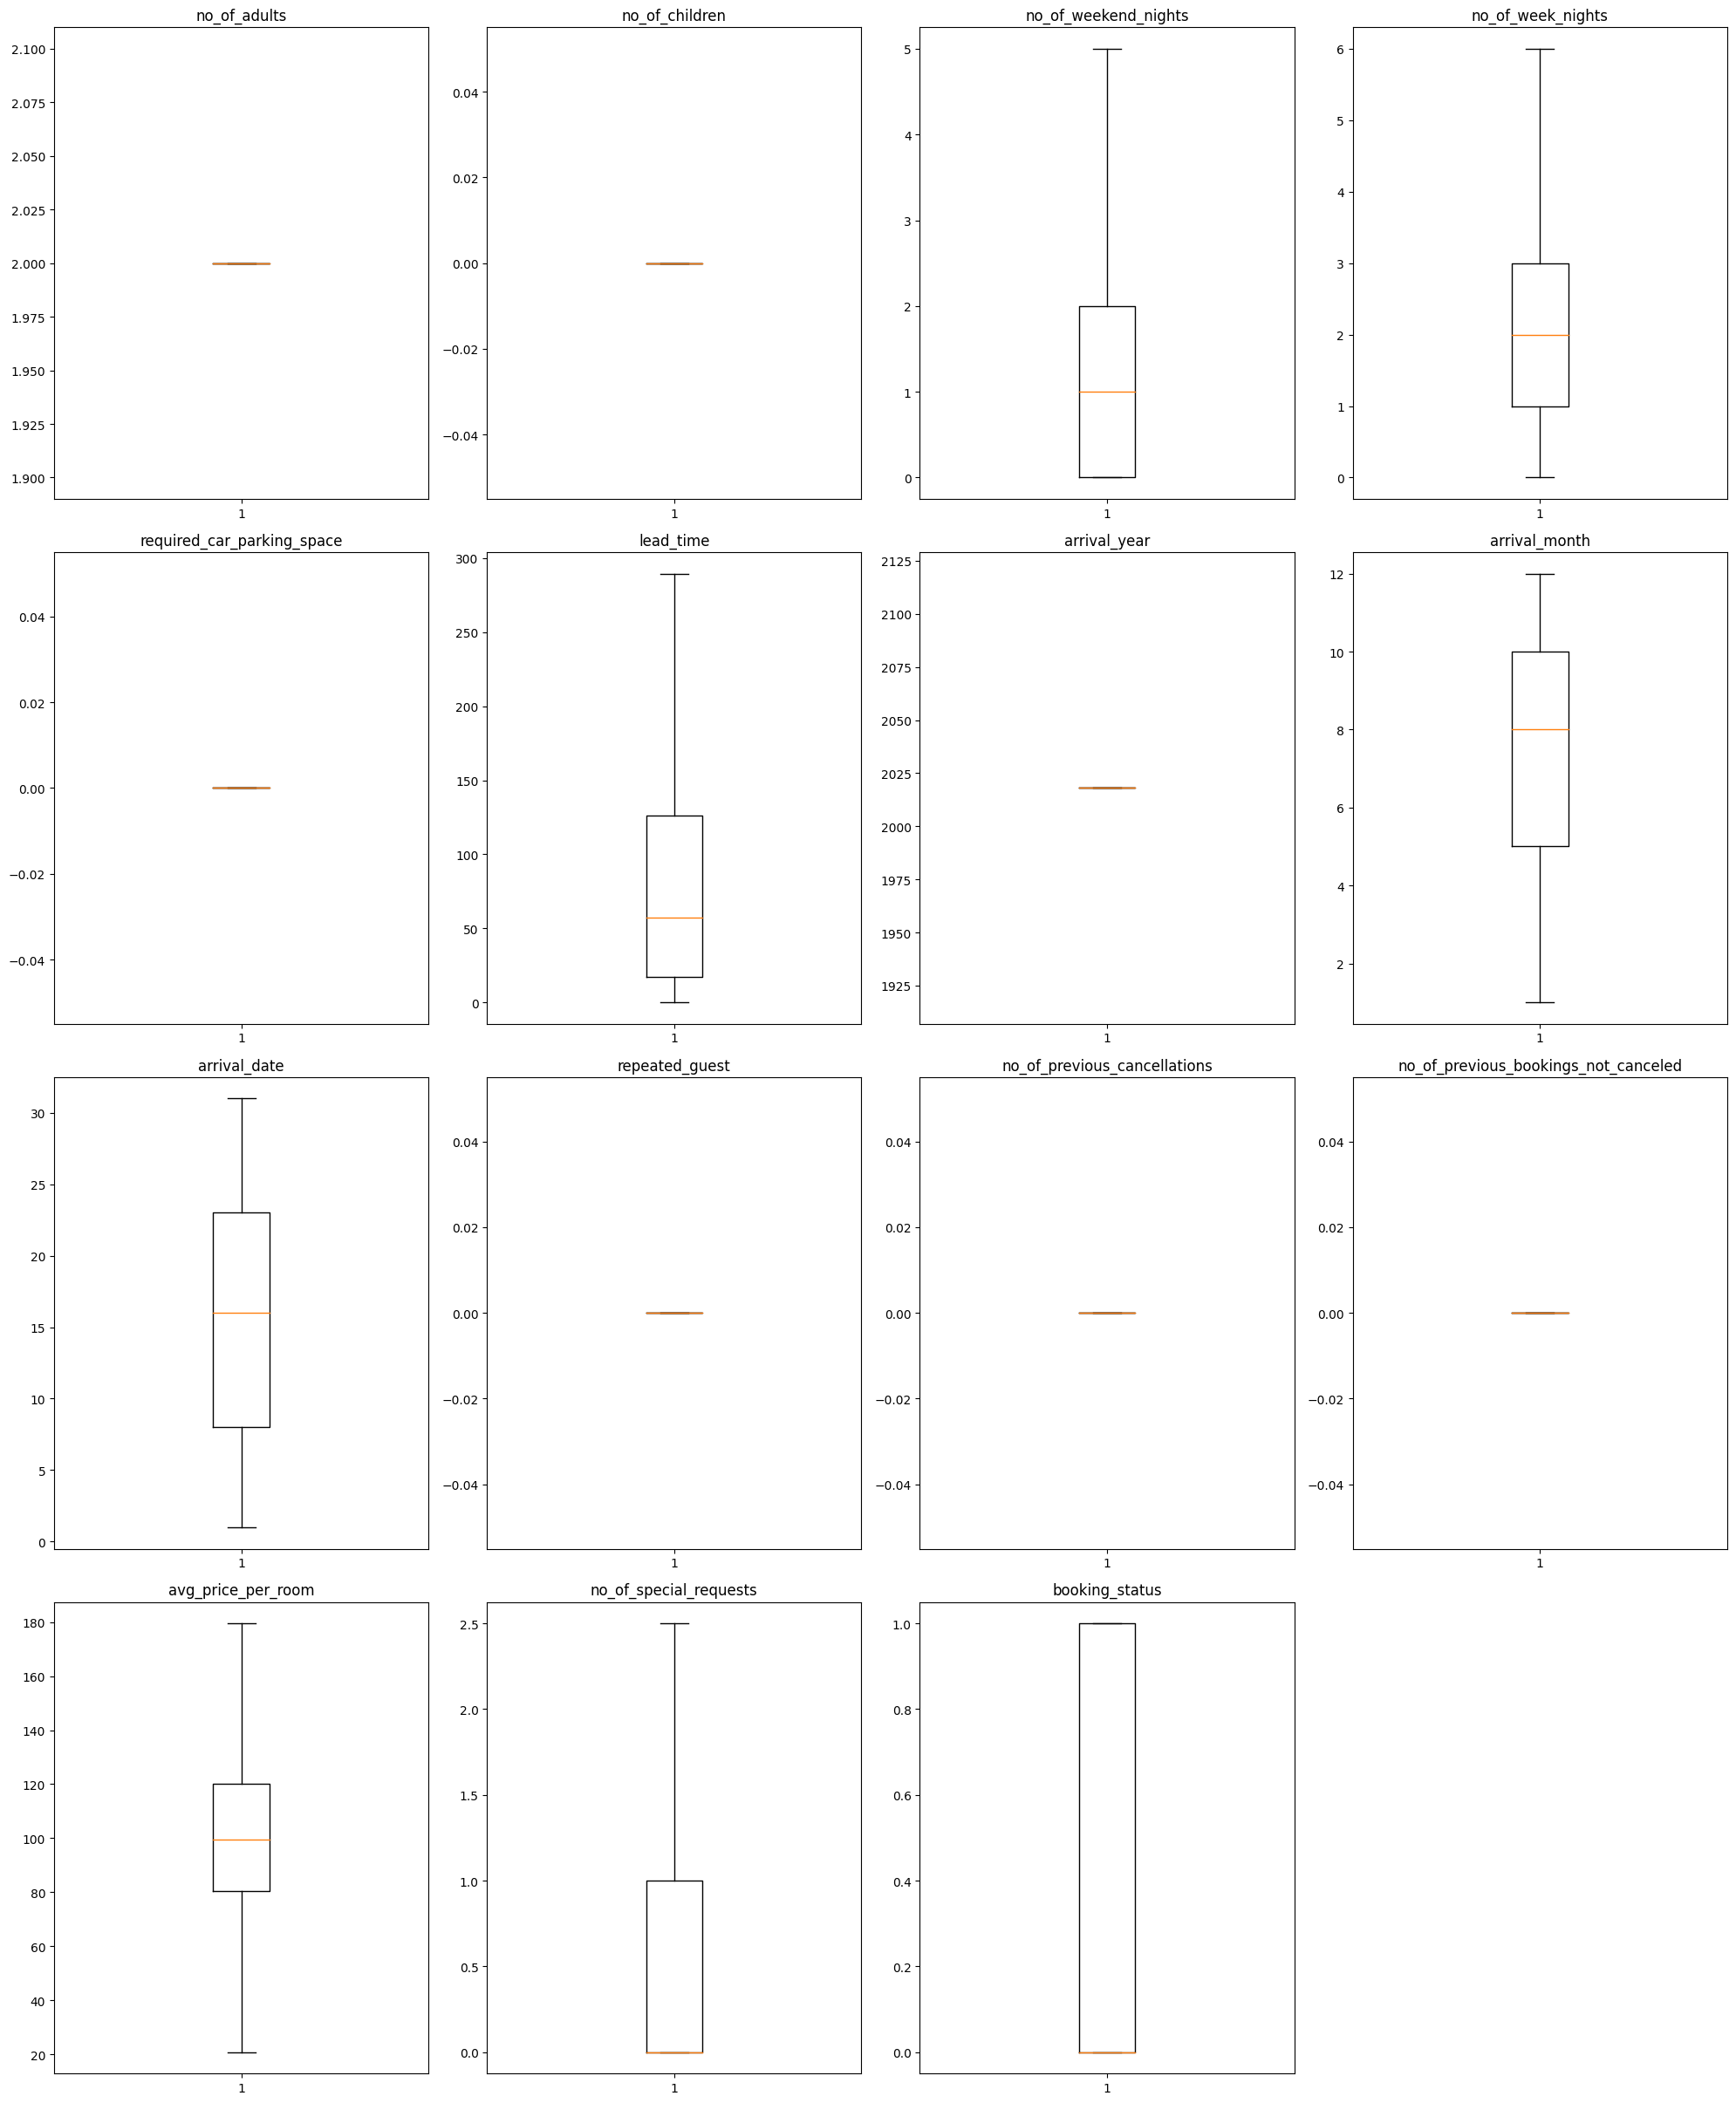

In [ ]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df_tmp[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()



*   There are no outliners in any numerical columns




#### Data Preparation for modeling (Logistic Regression)

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [10]:
# Dropping the columns that has mostly 0s and also unique id which is not really useful in analysis
df.drop(["Booking_ID"], axis=1, inplace=True)

In [11]:
# specifying the independent  and dependent variables
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [12]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0    0.670644
1    0.329356
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.676376
1    0.323624
Name: booking_status, dtype: float64


In [ ]:
X_train.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
13662    1.0             1               0                     0   
26641    1.0             2               0                     0   
17835    1.0             2               0                     2   
21485    1.0             2               0                     0   
5670     1.0             2               0                     1   

       no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
13662                  1                           0        163          2018   
26641                  3                           0        113          2018   
17835                  3                           0        359          2018   
21485                  3                           0        136          2018   
5670                   2                           0         21          2018   

       arrival_month  arrival_date  repeated_guest  \
13662             10            15               0   
26641              3            31               0   
17835             10            14               0   
21485              6            29               0   
5670               8            15               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
13662                             0                                     0   
26641                             0                                     0   
17835                             0                                     0   
21485                             0                                     0   
5670                              0                                     0   

       avg_price_per_room  no_of_special_requests  \
13662              115.00                       0   
26641               78.15                       1   
17835               78.00                       1   
21485               85.50                       0   
5670               151.00                       0   

       type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
13662                              0                              0   
26641                              0                              0   
17835                              0                              0   
21485                              0                              0   
5670                               0                              0   

       type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
13662                               0                               0   
26641                               0                               1   
17835                               0                               0   
21485                               1                               0   
5670                                0                               0   

       room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
13662                               0                               0   
26641                               0                               0   
17835                               0                               0   
21485                               0                               0   
5670                                0                               0   

       room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
13662                               0                               0   
26641                               0                               0   
17835                               0                               0   
21485                               0                               0   
5670                                0                               0   

       room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
13662                               0                                  0   
26641                               0                                  0   
17835                           

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

feature           VIF
0                                  const  3.949119e+07
1                           no_of_adults  1.348486e+00
2                         no_of_children  1.978622e+00
3                   no_of_weekend_nights  1.069487e+00
4                      no_of_week_nights  1.095670e+00
5             required_car_parking_space  1.039977e+00
6                              lead_time  1.395178e+00
7                           arrival_year  1.431668e+00
8                          arrival_month  1.276373e+00
9                           arrival_date  1.006735e+00
10                        repeated_guest  1.783612e+00
11          no_of_previous_cancellations  1.395688e+00
12  no_of_previous_bookings_not_canceled  1.651996e+00
13                    avg_price_per_room  2.064208e+00
14                no_of_special_requests  1.247302e+00
15         type_of_meal_plan_Meal Plan 2  1.273250e+00
16         type_of_meal_plan_Meal Plan 3  1.025217e+00
17        type_of_meal_plan_Not Selected  1.272519e+00
18        room_type_reserved_Room_Type 2  1.101505e+00
19        room_type_reserved_Room_Type 3  1.003303e+00
20        room_type_reserved_Room_Type 4  1.362614e+00
21        room_type_reserved_Room_Type 5  1.027970e+00
22        room_type_reserved_Room_Type 6  1.974902e+00
23        room_type_reserved_Room_Type 7  1.115594e+00
24     market_segment_type_Complementary  4.502286e+00
25         market_segment_type_Corporate  1.692846e+01
26           market_segment_type_Offline  6.411425e+01
27            market_segment_type_Online  7.117686e+01

## **Building a Logistic Regression model**

- We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

In [13]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 22 Sep 2023   Pseudo R-squ.:                  0.3292
Time:                        11:16:25   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.000
no_of_adults                             0.1137      

**Observations**

- Negative values of the coefficient show that the probability of a customer cancelling the reservation decreases with the increase of the corresponding attribute value.

- Positive values of the coefficient show that the probability of a customer cancelling the reservation increases with the increase of the corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

## Model performance evaluation

**Model can make wrong predictions as**:

1. Predicting customer will cancel the reservation but in reality doesn't cancel.

2. Predicting a customer doesn't cancel but in reality the customer cancels the reservation.

**Which case is more important?**

* Both the cases are important as in both cases the hotel lose money.


**How to reduce this loss?**

* We need to reduce both False Negatives and False Positives

* `f1_score` should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly
  * fi_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [19]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [20]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

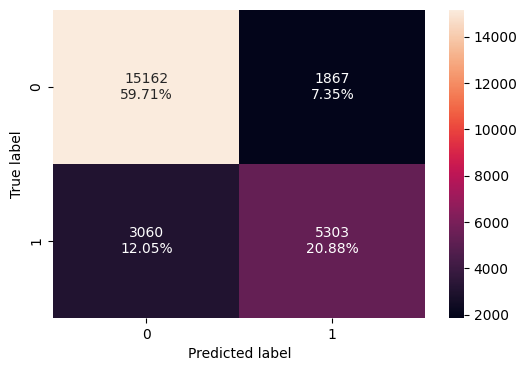

In [14]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [15]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.805963  0.634103   0.739609  0.682804

**Observations**

- The f1_score of the model is ~0.68 and we will try to maximize it further

- The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

### Detecting and Dealing with Multicollinearity

There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* **General Rule of thumb**:
  - If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* The purpose of the analysis should dictate which threshold to use

In [14]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   3.949769e+07
no_of_adults                            1.351135e+00
no_of_children                          2.093583e+00
no_of_weekend_nights                    1.069484e+00
no_of_week_nights                       1.095711e+00
required_car_parking_space              1.039972e+00
lead_time                               1.395175e+00
arrival_year                            1.431904e+00
arrival_month                           1.276334e+00
arrival_date                            1.006795e+00
repeated_guest                          1.783576e+00
no_of_previous_cancellations            1.395693e+00
no_of_previous_bookings_not_canceled    1.652000e+00
avg_price_per_room                      2.068603e+00
no_of_special_requests                  1.247981e+00
type_of_meal_plan_Meal Plan 2           1.273283e+00
type_of_meal_plan_Meal Plan 3           1.025258e+00
type_of_meal_plan_Not Selected          1.273060e+00
room_type_r



*   Market category has moderate multicollinearity
*   None of the predictors have very high multicollinrarity



#### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [15]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [16]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [17]:
# fitting logistic regression model
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 22 Sep 2023   Pseudo R-squ.:                  0.3282
Time:                        11:24:21   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600      0.000   -1151.758    -679.520
no_of_adults                       0.1088      0.037      2.914      0.

In [21]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train) # throws error



Training performance:


Accuracy    Recall  Precision        F1
0  0.805451  0.632668    0.73907  0.681742

**Now no categorical feature has p-value greater than 0.05, so we'll consider the features in *X_train1* as the final ones and *lg1* as final model.**

### Coefficient Interpretations

* Coefficient of some room type, market segment type, no_of_special_requests, repeated_guests, required_car_parking_space are negative, which means an increase in these will lead to decreas in chances of a customer cancelling the reservation.

* Coefficient of no_of_adults, no_of_children, no_of_weekend_nights, no_of_weekday_nights, lead_time, arrival month and year, some meal_type_plan, avg_price_per_room, no_of_previous_cancellations are positive which means  increase in these will lead to increase in chances of a customer cancelling the reservation.

**Converting coefficients to odds**

* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [22]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.0       1.11491        1.165459              1.114697   
Change_odd% -100.0      11.49096       16.545927             11.469662   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                  1.042584                    0.202961   1.015833   
Change_odd%           4.258406                  -79.703947   1.583312   

             arrival_year  arrival_month  repeated_guest  \
Odds             1.571951       0.958388        0.064782   
Change_odd%     57.195078      -4.161197      -93.521802   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                             1.257118            1.019368   
Change_odd%                     25.711810            1.936838   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                       0.229963                       1.178464   
Change_odd%              -77.003739                      17.846408   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                               1.331095                        0.701041   
Change_odd%                       33.109465                      -29.895882   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                               0.753645                        0.478845   
Change_odd%                      -24.635508                      -52.115481   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                               0.379771                        0.238271   
Change_odd%                      -62.022895                      -76.172939   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                              0.453263                     0.167728  
Change_odd%                     -54.673731                   -83.227238

**Coefficient interpretations**

* `no_of_adults`: Holding all other features constant a 1 unit change in no_of_adults will increase the odds of a customer cancelling the reservation by ~1.11 times or a ~11%.
* `required_car_parking_space`: Holding all other features constant a 1 unit change in the required_car_parking_space will decrease the odds of a customer cancelling the reservation by ~0.202 times or a decrease of ~79.7%.

#### Checking model performance on the training set

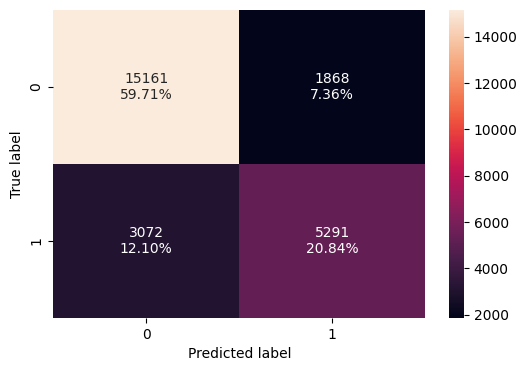

In [23]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [24]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train) ## Complete the code to check performance on X_train1 and y_train
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.805451  0.632668    0.73907  0.681742

#### ROC-AUC
* ROC-AUC on training set

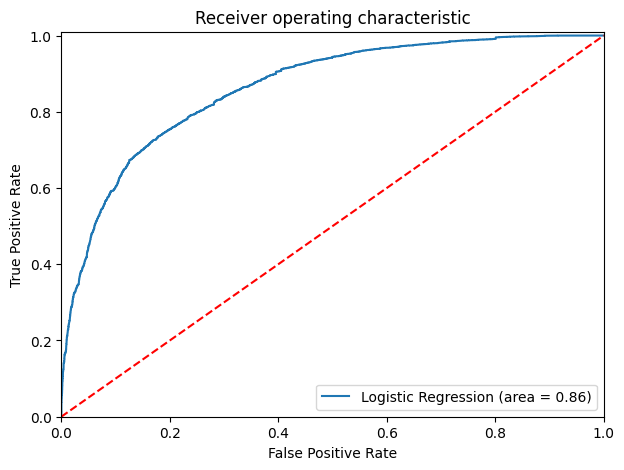

In [25]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

#### Optimal threshold using AUC-ROC curve

In [26]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3700522558708252


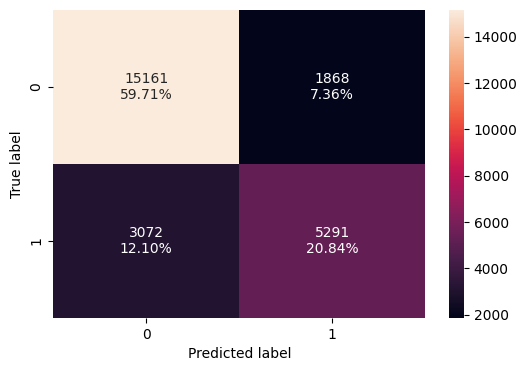

In [27]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train
)

In [28]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.792651  0.736219   0.668077  0.700495

#### Let's use Precision-Recall curve and see if we can find a better threshold

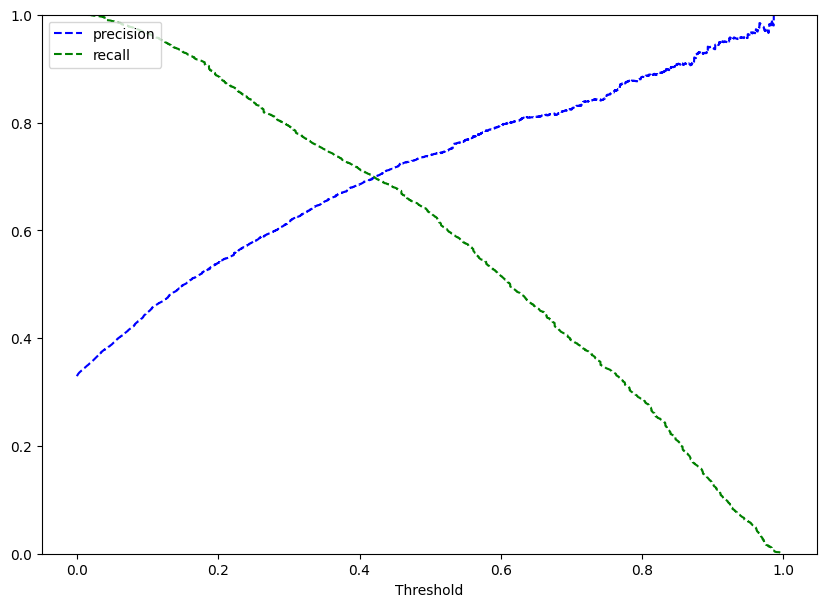

In [29]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [31]:
# setting the threshold
optimal_threshold_curve = 0.42

#### Checking model performance on training set

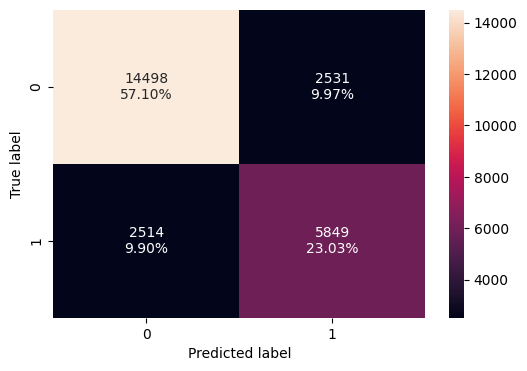

In [32]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train,  threshold=optimal_threshold_curve,
) ## Complete the code to create the confusion matrix for X_train1 and y_train with optimal_threshold_curve as threshold

In [33]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy   Recall  Precision       F1
0  0.801315  0.69939   0.697971  0.69868

#### Let's check the performance on the test set

**Using model with default threshold**

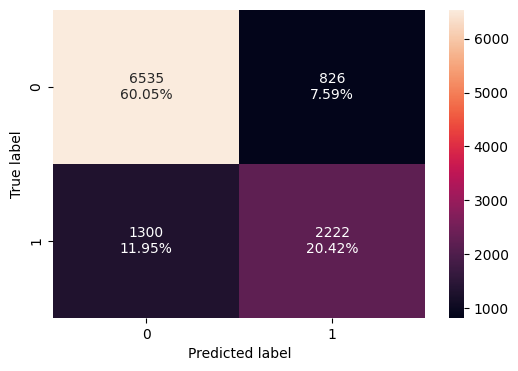

In [35]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test) ## Complete the code to create confusion matrix for X_test1 and y_test

In [36]:
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, X_test1, y_test) ## Complete the code to check performance on X_test1 and y_test

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.804649  0.630892   0.729003  0.676408

* ROC curve on test set

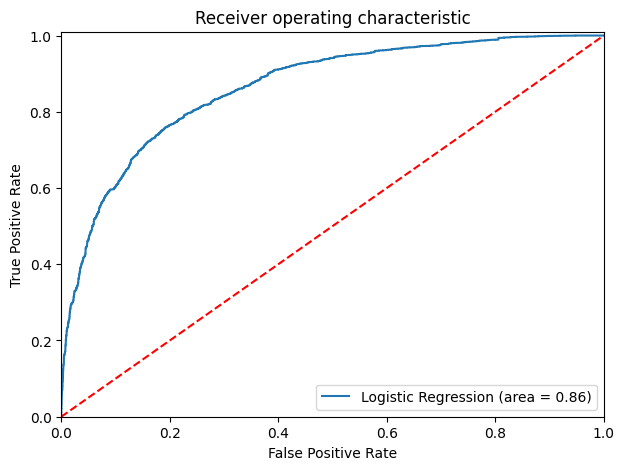

In [37]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.37**

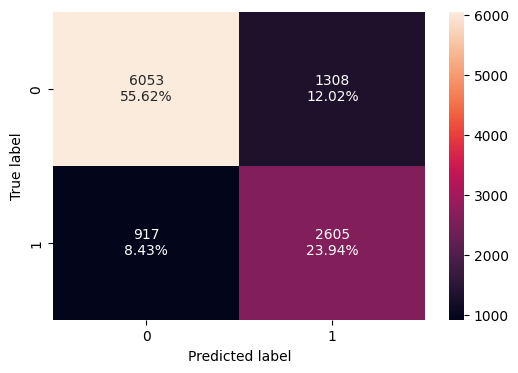

In [38]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1,X_test1, y_test, threshold=optimal_threshold_auc_roc) ## Complete the code to create confusion matrix for X_test1 and y_test using optimal_threshold_auc_roc as threshold

In [39]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy    Recall  Precision       F1
0  0.795553  0.739637    0.66573  0.70074

**Using model with threshold = 0.42**

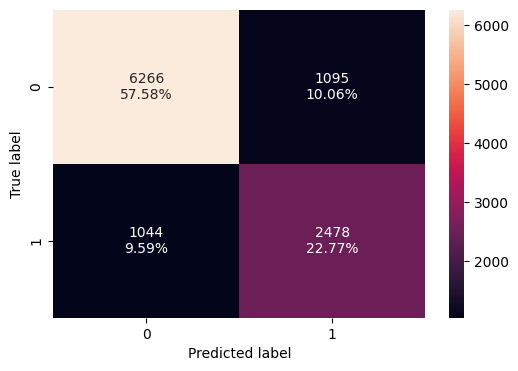

In [40]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve) ## Complete the code to create confusion matrix for X_test1 and y_test using optimal_threshold_curve as threshold

In [41]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy    Recall  Precision       F1
0  0.803455  0.703578   0.693535  0.69852

#### Model performance summary

In [42]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                0.805451   
Recall                                  0.632668   
Precision                               0.739070   
F1                                      0.681742   

           Logistic Regression-0.37 Threshold  \
Accuracy                             0.792651   
Recall                               0.736219   
Precision                            0.668077   
F1                                   0.700495   

           Logistic Regression-0.42 Threshold  
Accuracy                             0.801315  
Recall                               0.699390  
Precision                            0.697971  
F1                                   0.698680

In [43]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Testing performance comparison:")
models_test_comp_df


Testing performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                0.804649   
Recall                                  0.630892   
Precision                               0.729003   
F1                                      0.676408   

           Logistic Regression-0.37 Threshold  \
Accuracy                             0.795553   
Recall                               0.739637   
Precision                            0.665730   
F1                                   0.700740   

           Logistic Regression-0.42 Threshold  
Accuracy                             0.803455  
Recall                               0.703578  
Precision                            0.693535  
F1                                   0.698520

- Almost all the three models are performing well on both training and test data without the problem of overfitting
- The model with a threshold (0.37) is giving the best F1 score. Therefore it can be selected as the final model

## Final Model Summary

* We have been able to build a predictive model that can be used by the hotel to find the customers who will cancel the reservation with an f1_score of 0.70 on the training set and formulate policies accordingly.

* All the logistic regression models have given a generalized performance on the training and test set.

* Coefficient of some levels of no_of_adults, no_of_children,no_of_weekend_nights, no_of_week_nights, lead_time, arrival_year, no_of_previous_cancellations, avg_price_per_room and some of type_of_meal_plan_Meal are positive an increase in these will lead to increase in chances of a customer cancelling the reservation.

* Coefficient of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests,some of room_type and some type of market_segment are negative increase in these will lead to decrease in chances of a customer cancelling the reservation.

## **Building a Decision Tree model**

In [10]:
# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

In [11]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [12]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [13]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

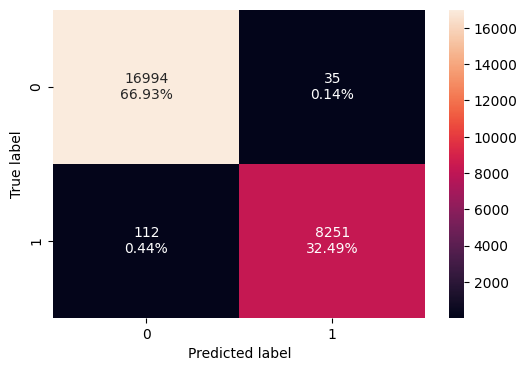

In [14]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [15]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

Accuracy    Recall  Precision        F1
0  0.994211  0.986608   0.995776  0.991171

#### Checking model performance on test set

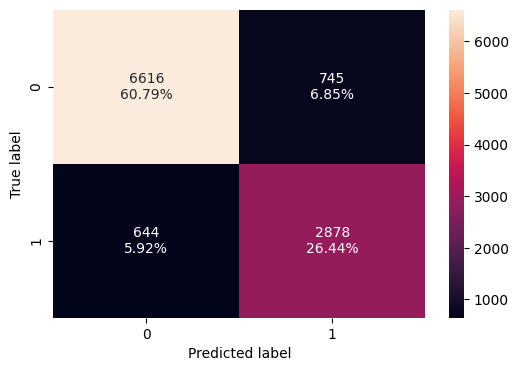

In [16]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [17]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

Accuracy    Recall  Precision        F1
0   0.87237  0.817149   0.794369  0.805598

### Decision Tree (with class_weights)

* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier

In [18]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

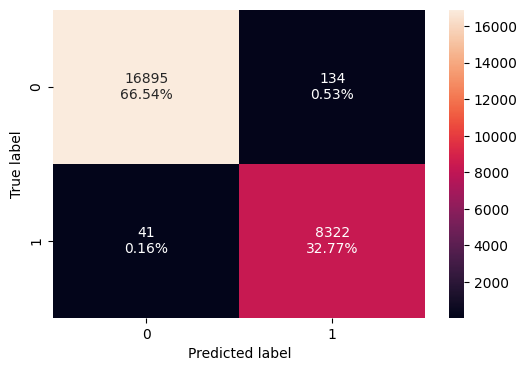

In [19]:
confusion_matrix_sklearn(model, X_train, y_train)

In [20]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy    Recall  Precision        F1
0  0.993108  0.995097   0.984153  0.989595

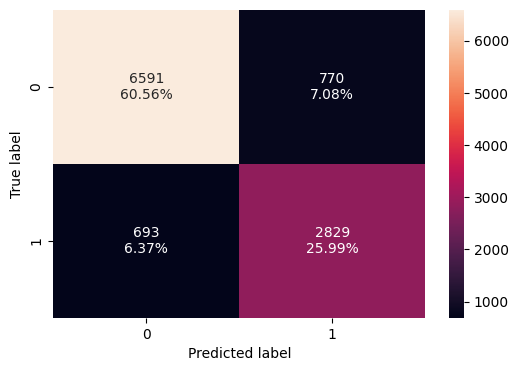

In [21]:
confusion_matrix_sklearn(model, X_test, y_test)

In [22]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0   0.86557  0.803237   0.786052  0.794551

**Before pruning the tree let's check the important features.**

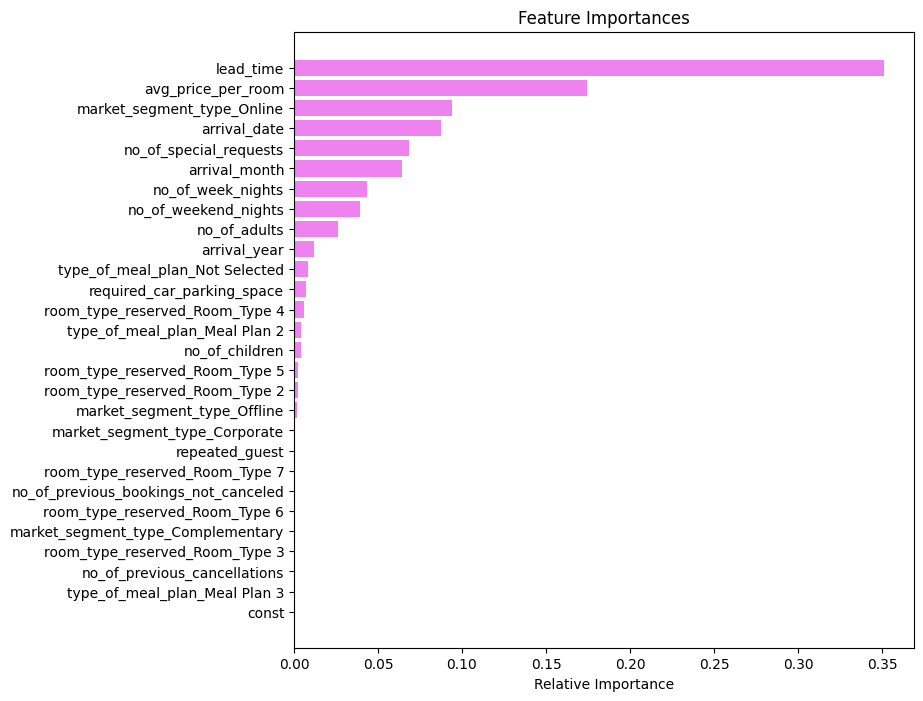

In [44]:
feature_names = list(X_train.columns)
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Do we need to prune the tree?

* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

Pre-Pruning

In [23]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

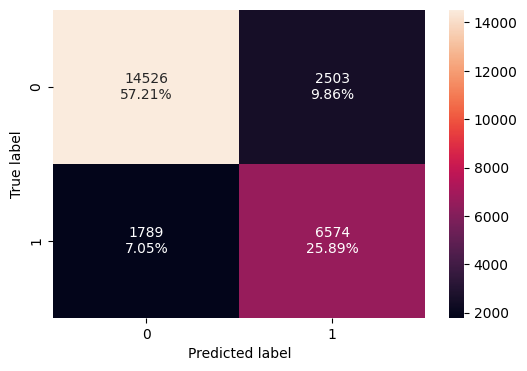

In [24]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [25]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0   0.83097  0.786082   0.724248  0.753899

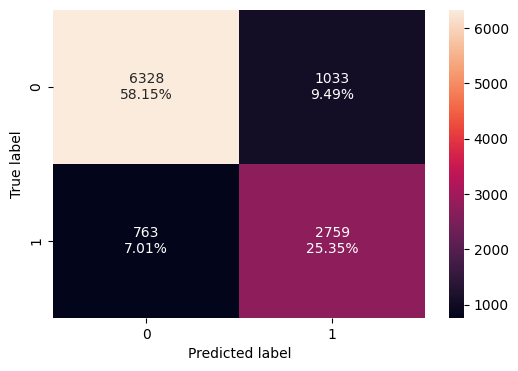

In [26]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [27]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.834972  0.783362   0.727584  0.754444

* The model is giving a generalized result now since the recall scores on both the train and test data are coming to be around 0.79 which shows that the model is able to generalize well on unseen data.

#### Visualizing the Decision Tree

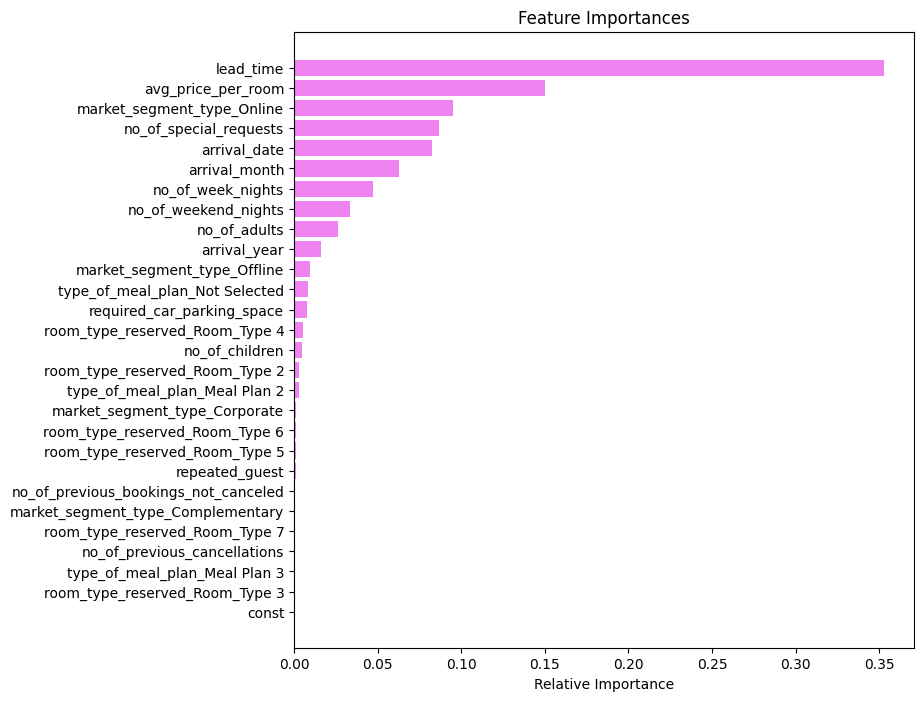

In [29]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

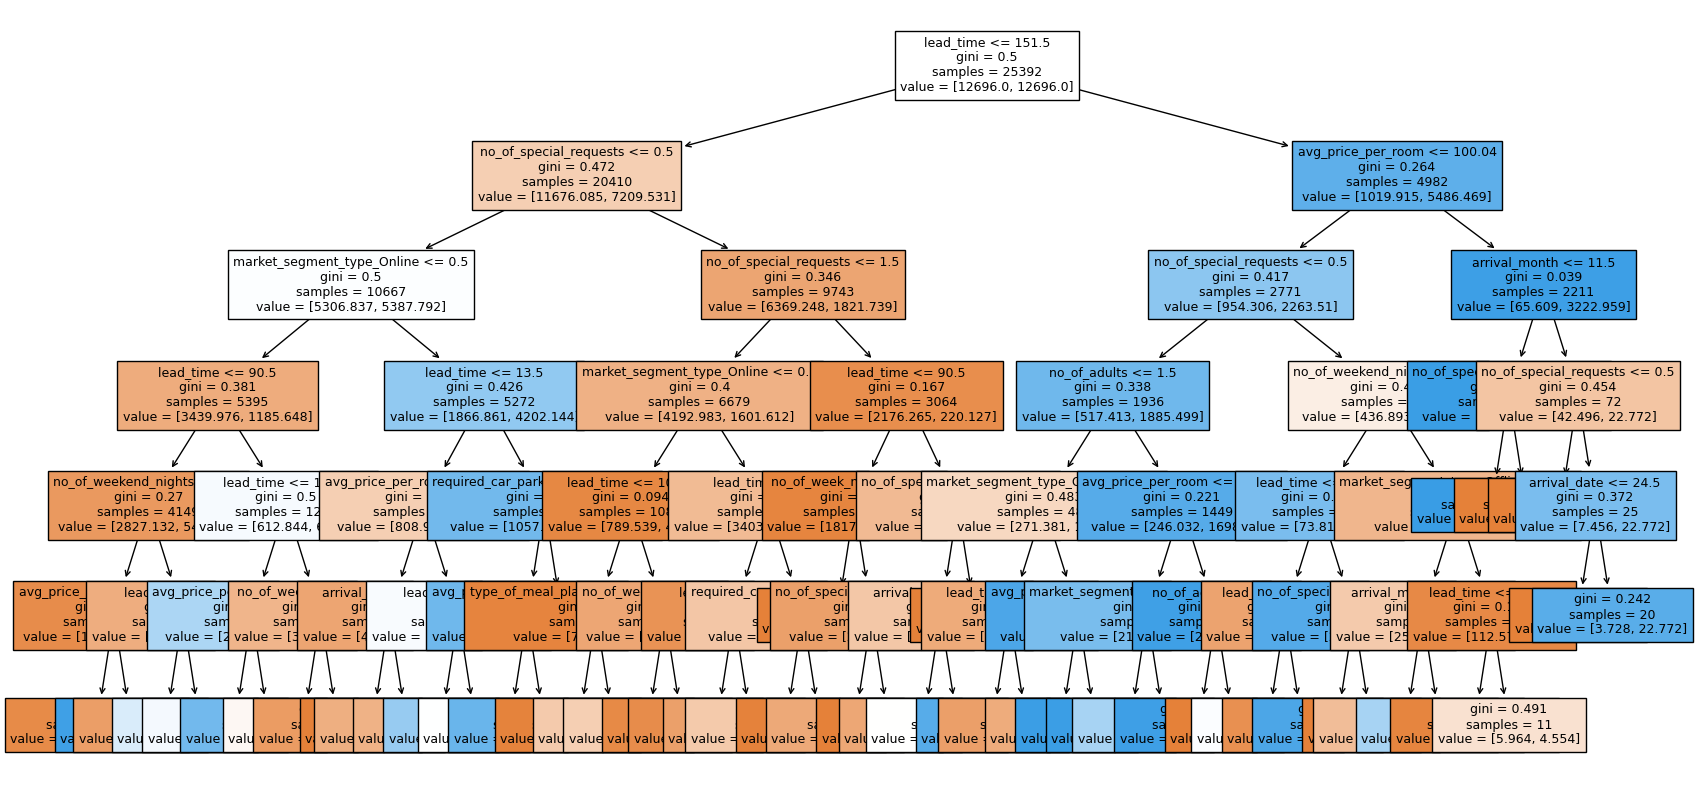

In [30]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [31]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

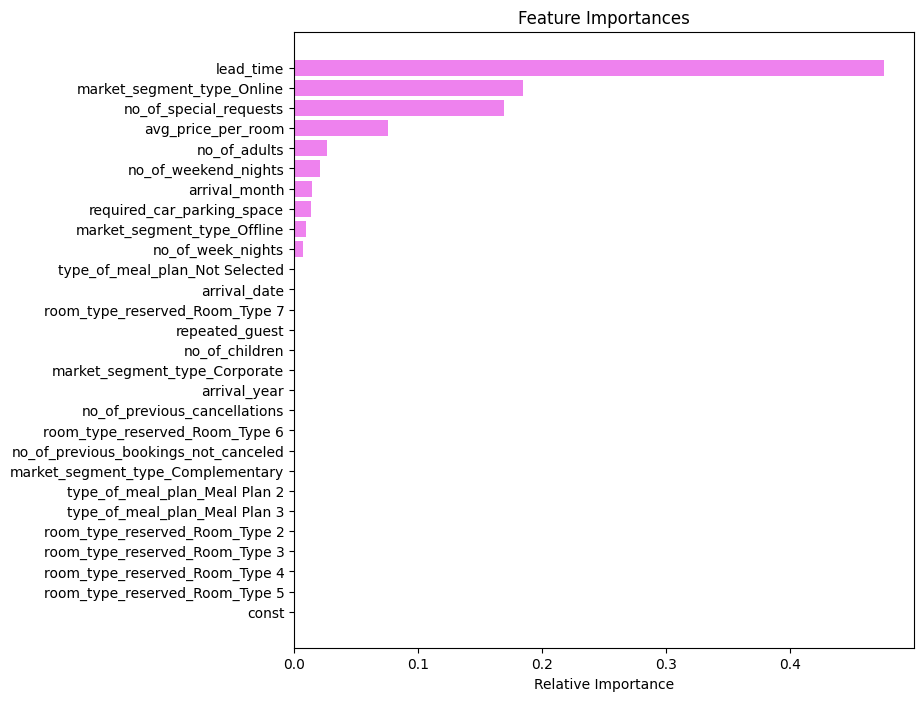

In [32]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Cost Complexity Pruning**

In [33]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [34]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.008376
1     0.000000e+00    0.008376
2     2.933821e-20    0.008376
3     2.933821e-20    0.008376
4     2.933821e-20    0.008376
...            ...         ...
1831  8.901596e-03    0.328058
1832  9.802243e-03    0.337860
1833  1.271875e-02    0.350579
1834  3.412090e-02    0.418821
1835  8.117914e-02    0.500000

[1836 rows x 2 columns]

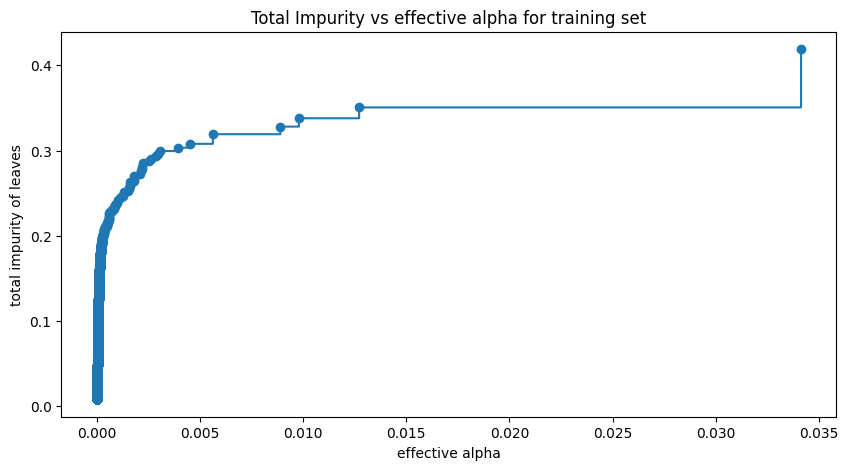

In [35]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [36]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train) ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136954


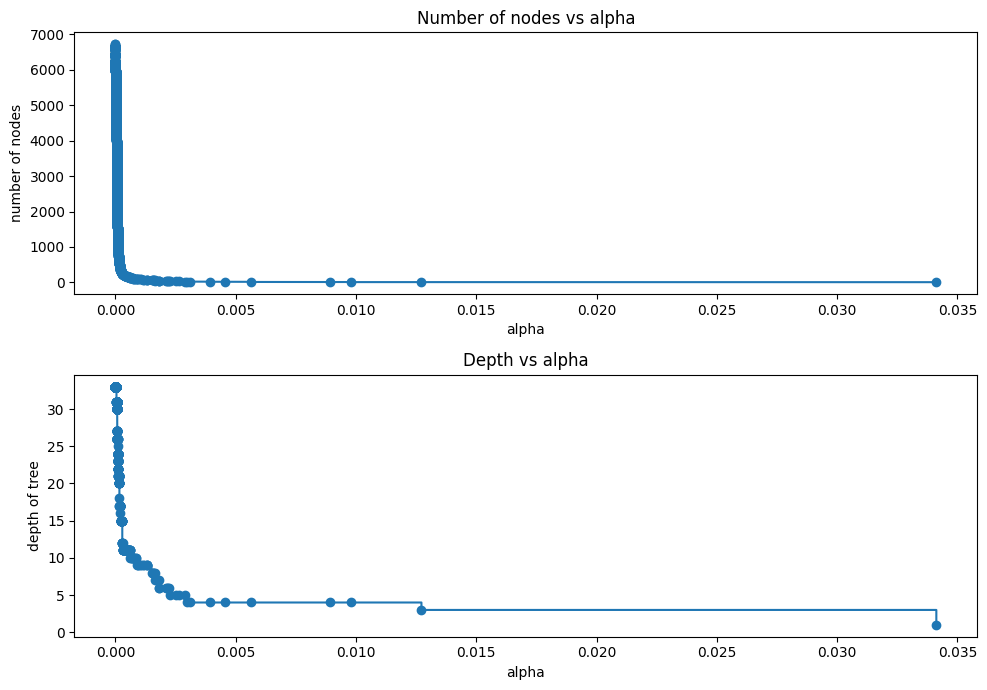

In [37]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### F1 Score vs alpha for training and testing sets

In [38]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

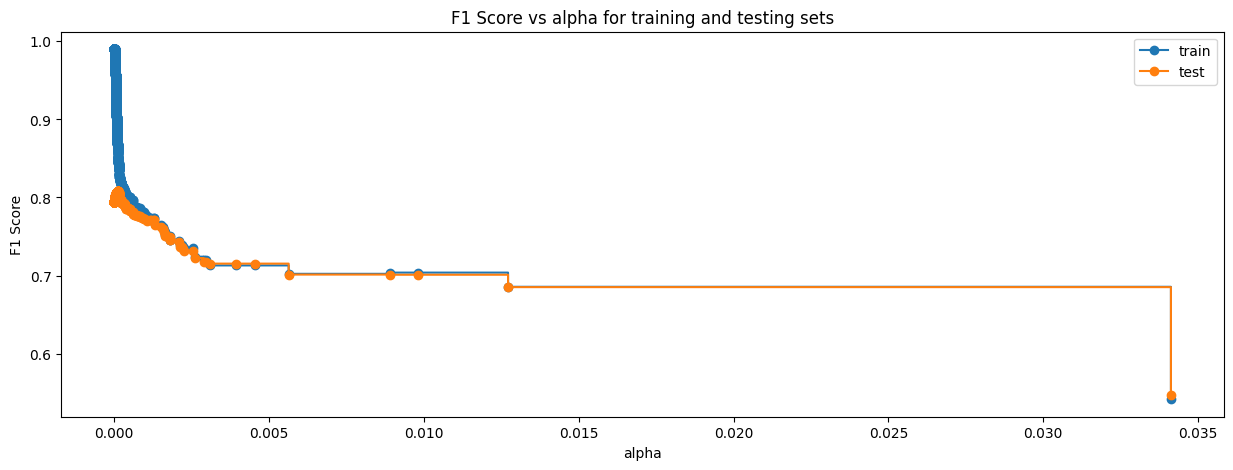

In [39]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [40]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167056,
                       class_weight='balanced', random_state=1)


#### Checking performance on training set

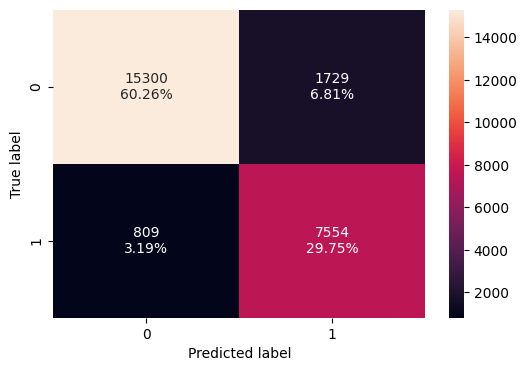

In [41]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [42]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy    Recall  Precision        F1
0  0.900047  0.903264   0.813746  0.856171

#### Checking performance on test set

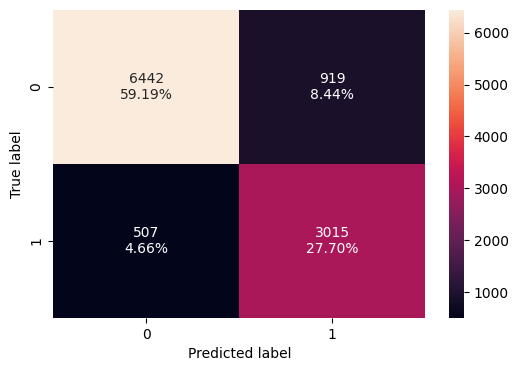

In [43]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [44]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

Accuracy    Recall  Precision        F1
0   0.86897  0.856048   0.766396  0.808745

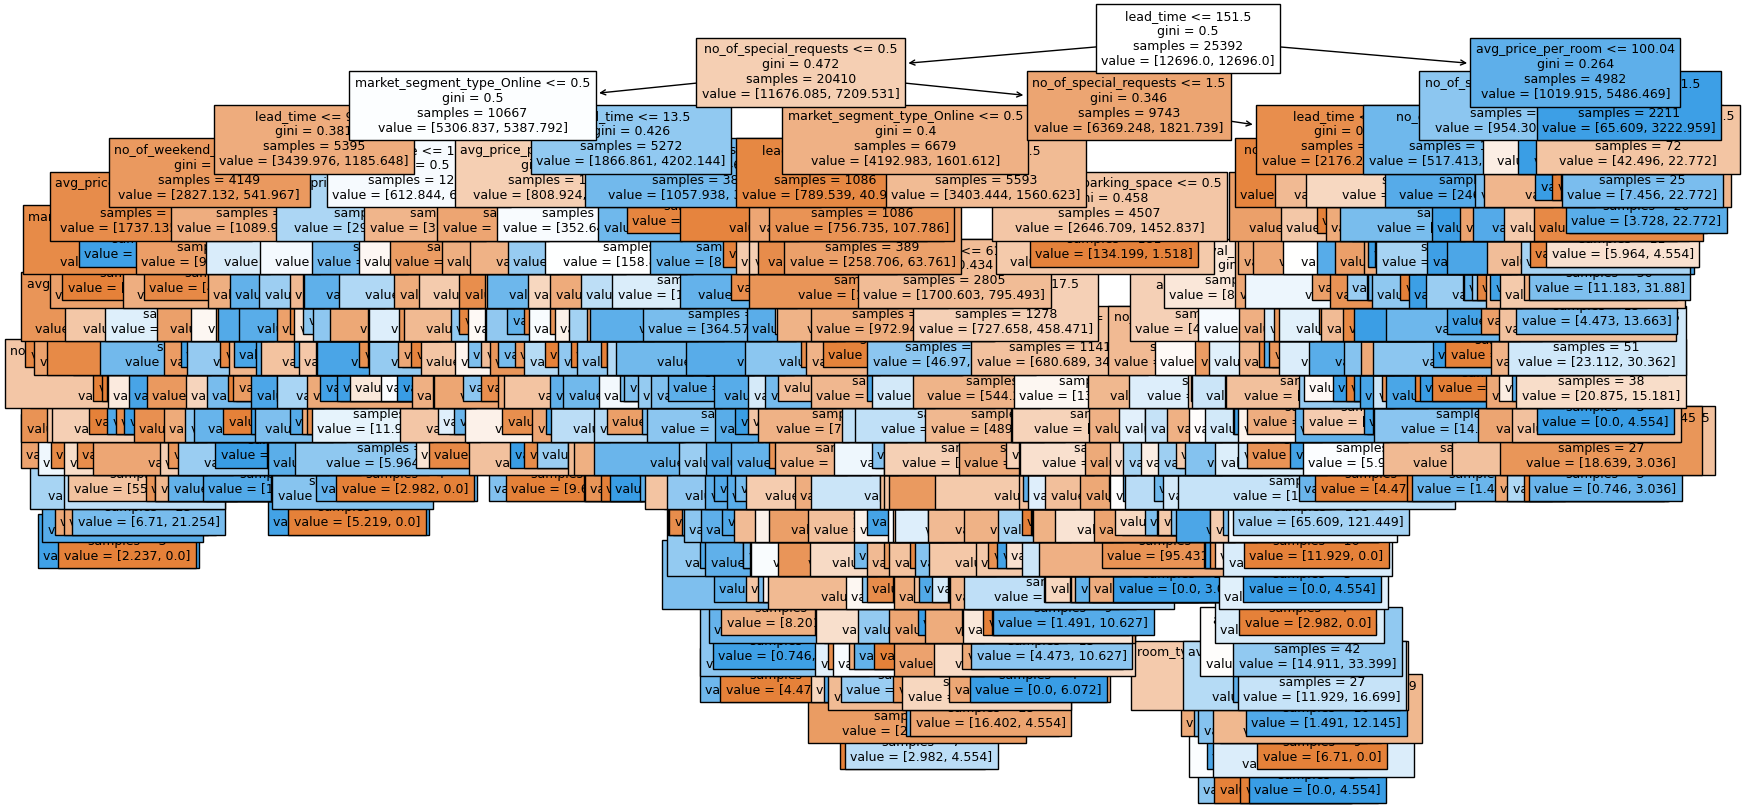

In [45]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [46]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

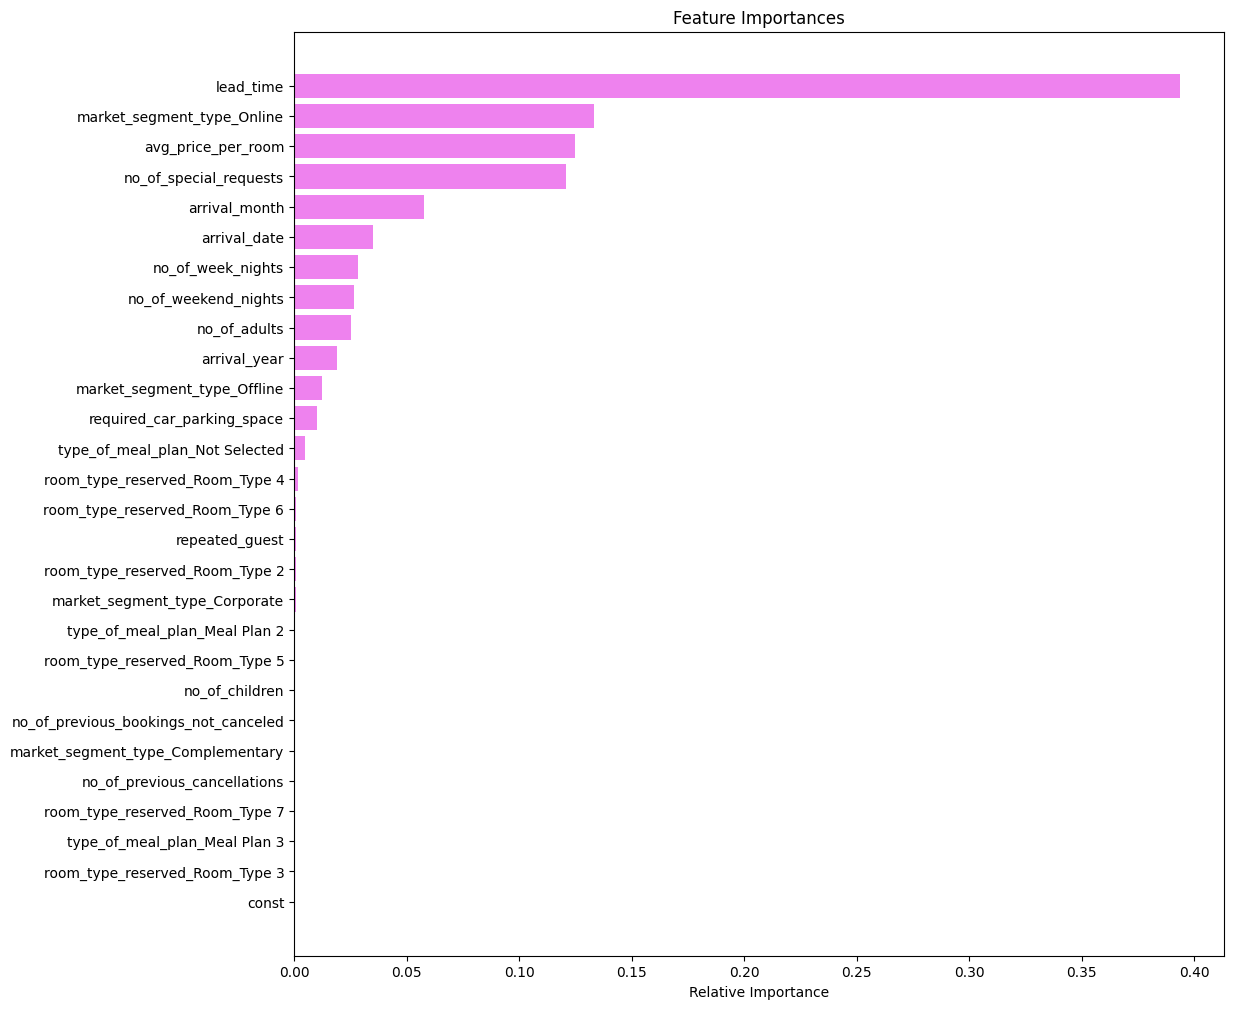

In [47]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Conclusions

#### Comparing Decision Tree models

In [48]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.993108                     0.830970   
Recall                  0.995097                     0.786082   
Precision               0.984153                     0.724248   
F1                      0.989595                     0.753899   

           Decision Tree (Post-Pruning)  
Accuracy                       0.900047  
Recall                         0.903264  
Precision                      0.813746  
F1                             0.856171

In [49]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df


Testing performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.865570                     0.834972   
Recall                  0.803237                     0.783362   
Precision               0.786052                     0.727584   
F1                      0.794551                     0.754444   

           Decision Tree (Post-Pruning)  
Accuracy                       0.868970  
Recall                         0.856048  
Precision                      0.766396  
F1                             0.808745

* Decision tree models with pre-pruning and post-pruning both are giving almost equal  recall scores on both training and test sets.
* However, we will choose the post pruned tree as the best model since it is giving a slightly higher scores for precision on the train and test sets than the pre-pruned tree.

## Conclusions and Recommendations

- The model built can be used to predict if a customer is going to cancel the reservation or not and can correctly identify 85.6% of the cancellations.

- There are 13 different variables influence the cancellations, lead_time bing the most important variable that determines the output.  market_segment_type, avg_price_per_room, no_of_special_requests are also the most important variables in predicting whether a reservation will be cancelled or not.


- From the decision tree, it has been observed that the reservation may be cancelled if
   the lead_time is less 151.50, the no_of_special_requests is less than .50, the market_segment_type is online with less than 0.50

   the lead_time is less 90.50, the no_of_weekend_nights is less than .50, the avg_price_per_room less than 196.50, the market_segment_type is offline with less than 0.50
    
   the lead_time is less 16.50, the avg_price_per_room less than 68.50
  - The company should give a vigilant eye for these values in order to detect the cancellations.


- The company should use more data for the analysis to get more reliable results


- As the variable used depend on multiple variables, the company can look to build separate models for each different type of variable.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?



*   Repeated guests has very low cancellations but most of the customers are new and very few (2.6%) are repeated guests, hotel management should focus on how to get the customers back.
*   Customers with special requests has low cancellations. Management can focus more on advertising or adding more special treatments and attract customers to use those offerings.
*   Reservations by Market segment types Offline and Corporate have low cancellations. Management can focus more on these market segments.
*   Cancellations vary based on the avg_price_per_room which increases as the price increases.
*   The busy months are August, September and October






